# (모수추정)베이즈추정법, 검정(testing)

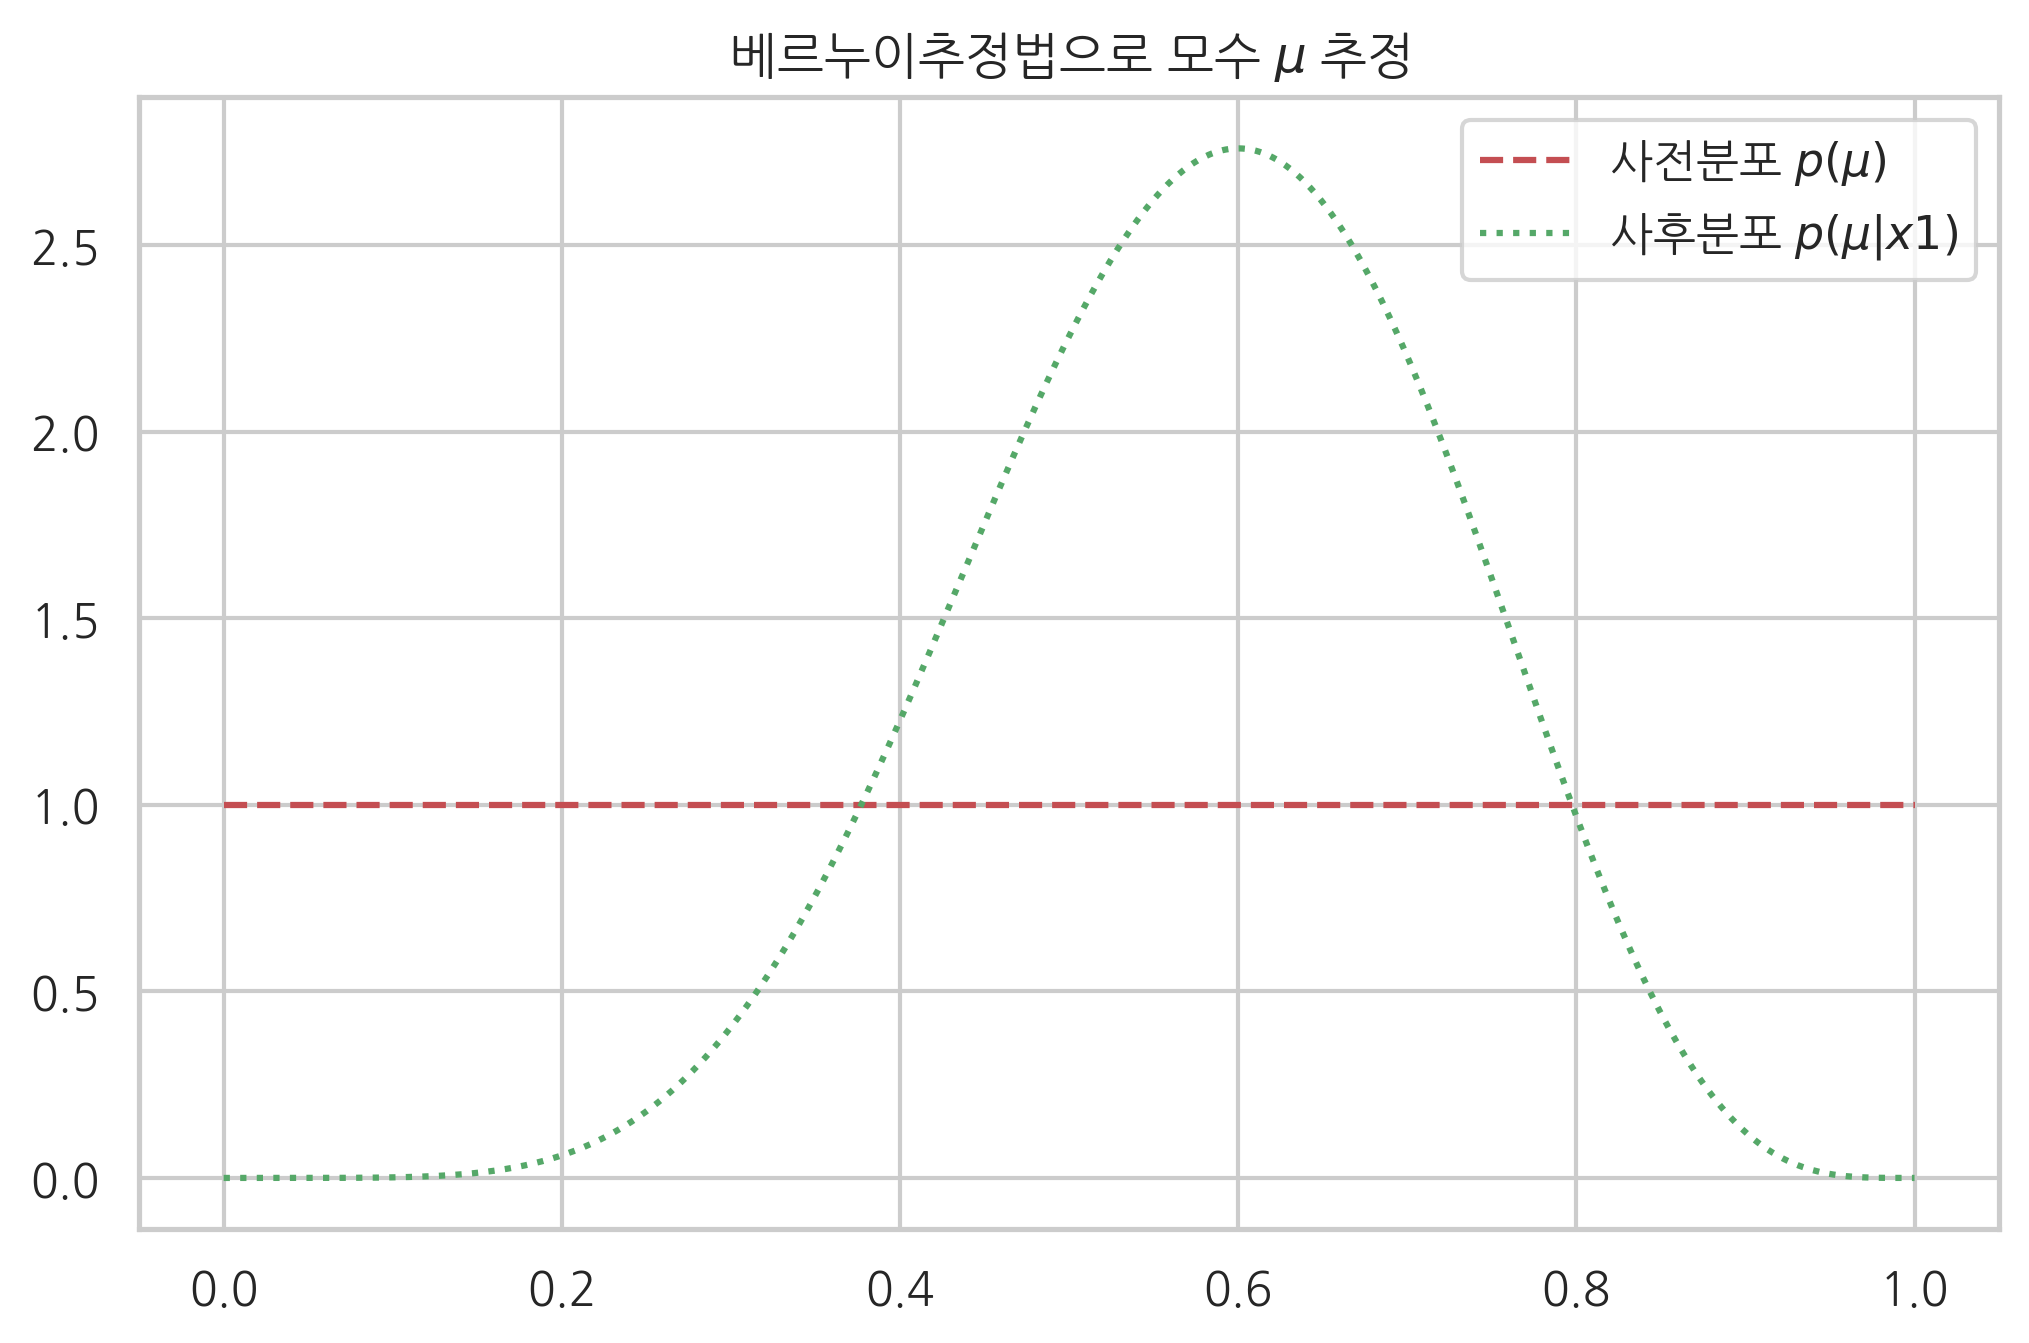

In [6]:
# 예제 
#사전분포 
xx = np.linspace(0,1,1000)
a0 = 1
b0 = 1
plt.plot(xx, sp.stats.beta(a0,b0).pdf(xx), c='r', ls='--', label='사전분포 $p(\mu)$')

# 사후분포 
a1 = 7
b1 = 5
plt.plot(xx, sp.stats.beta(a1,b1).pdf(xx), c='g', ls=':', label='사후분포 $p(\mu|x1)$')
plt.legend()
plt.title('베르누이추정법으로 모수 $\mu$ 추정')
plt.show()

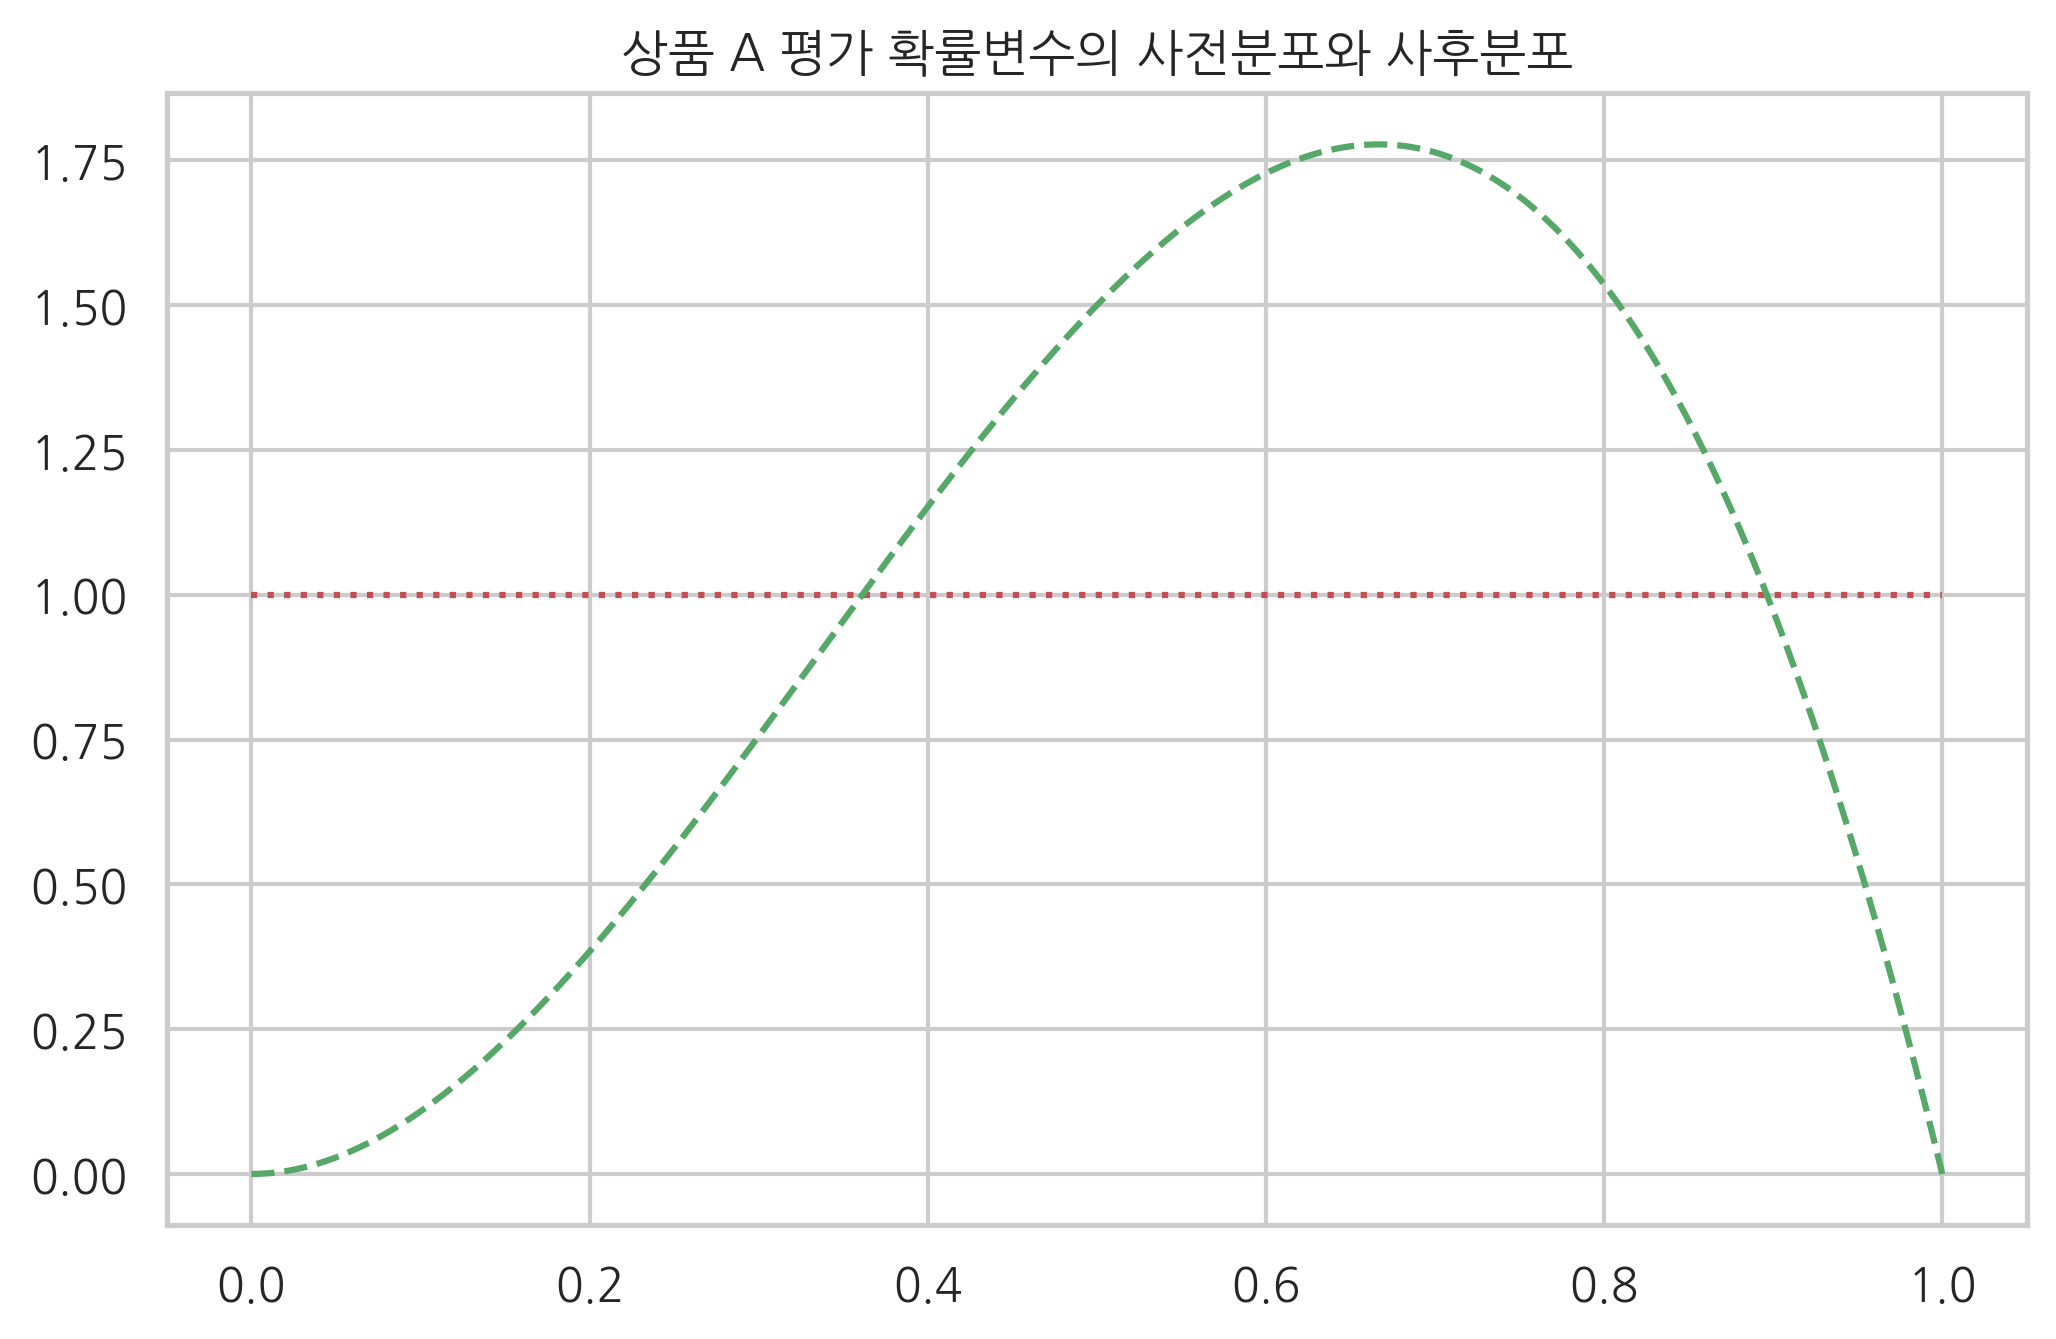

In [10]:
# 9.3.1 연습문제 
# 베이즈추정법
#상품 A 평가 확률변수의 사전분포와 사후분포 

xx = np.linspace(0,1,1000)
a0 = 1
b0 = 1
plt.plot(xx, sp.stats.beta(a0,b0).pdf(xx), ls=':', c='r', label='사전분포')

a1 = 2+1
b1 = 1+1
plt.plot(xx, sp.stats.beta(a1, b1).pdf(xx), ls='--', c='g', label='사후분포')
plt.title('상품 A 평가 확률변수의 사전분포와 사후분포')
plt.show()

Text(0.5, 1.0, '상품 B 모수 조건부 분포의 사전분포와 사후분포')

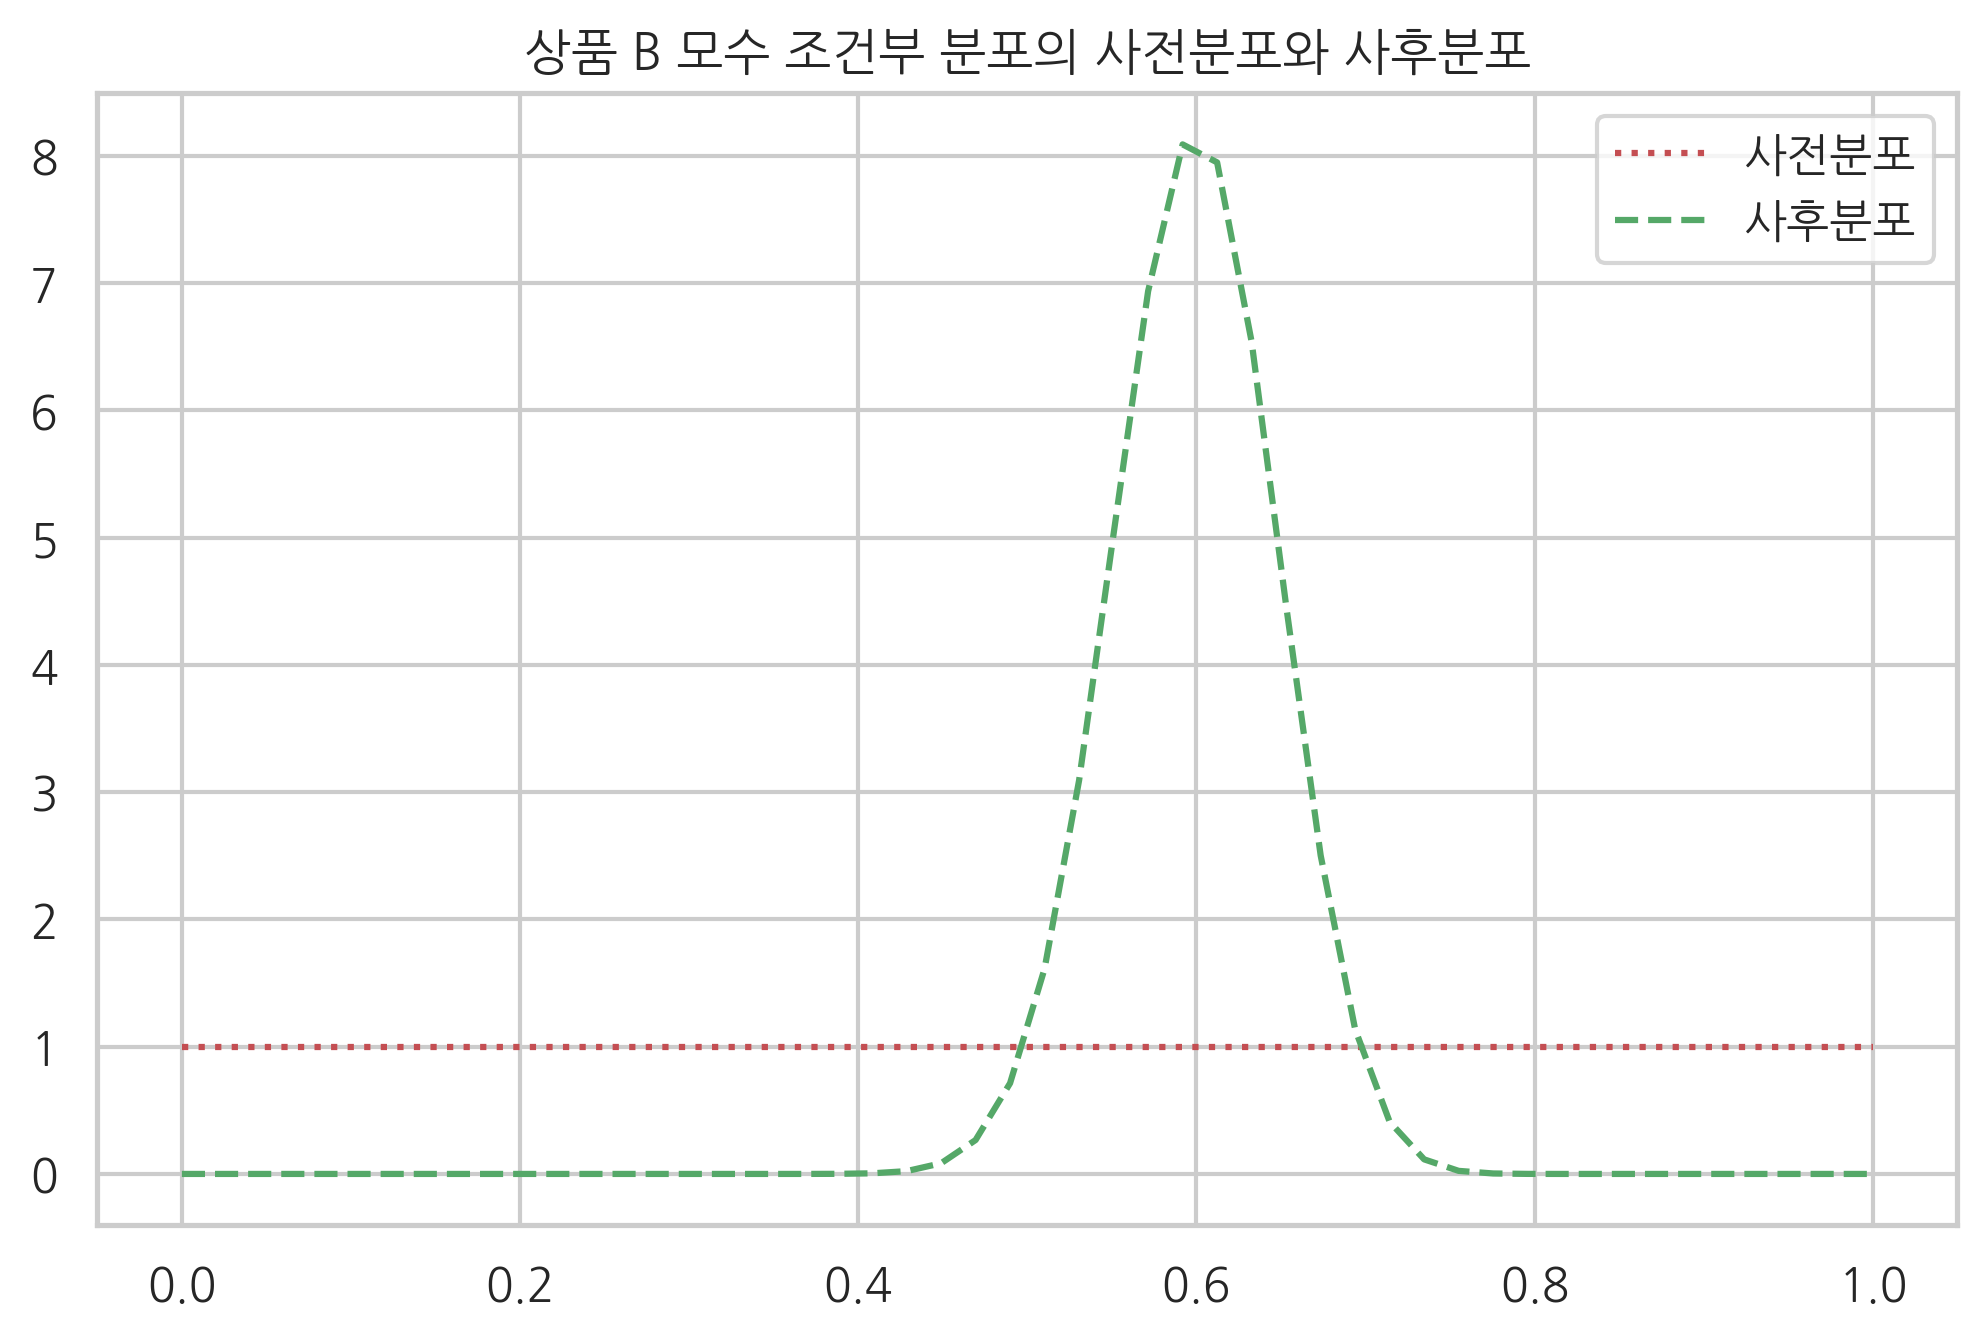

In [13]:
# 상품 B
xx = np.linspace(0,1)
a0 = 1
b0 = 1
plt.plot(xx, sp.stats.beta(a0,b0).pdf(xx), ls=':', c='r', label='사전분포')

a1 = 60+1
b1 = 40+1
plt.plot(xx, sp.stats.beta(a1, b1).pdf(xx), ls='--', c='g', label='사후분포')
plt.legend()
plt.title('상품 B 모수 조건부 분포의 사전분포와 사후분포')

1차 추정 : 모드 = 0.64
2차 추정 : 모드 = 0.69
3차 추정 : 모드 = 0.6466666666666666


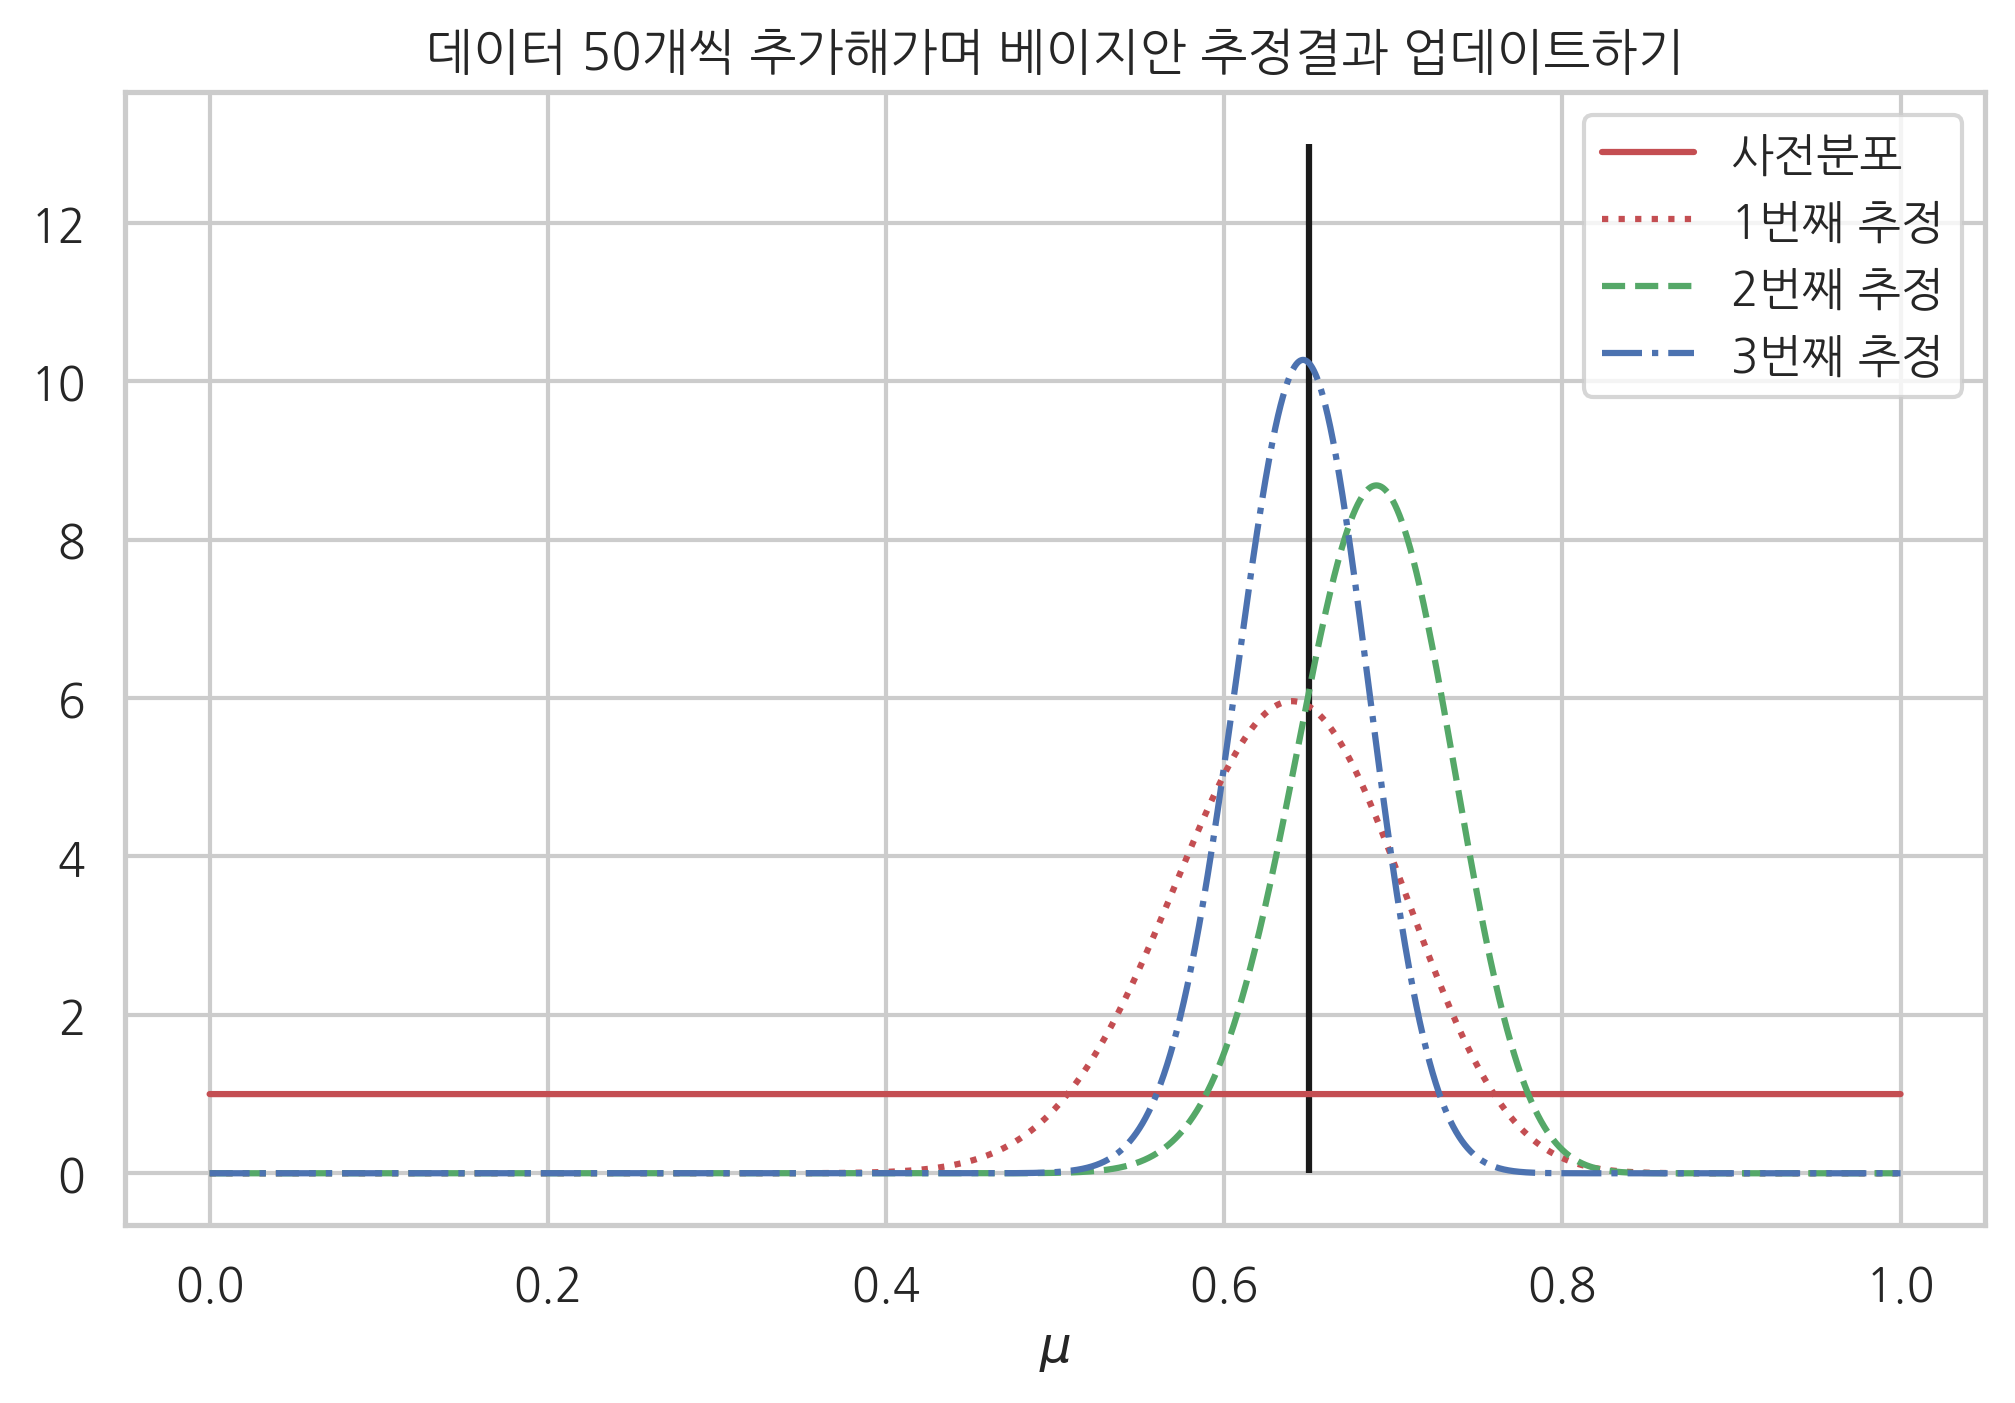

In [41]:
# 실제 베르누이분포 모숫값 : 0.65
# 베이즈 추정법 사용한 모수추정을 해보자. 
# 데이터 50개씩 추가해가면서 추정 결과를 업데이트하자. 

mu0 = 0.65
a,b = 1,1
xx = np.linspace(0,1,10000)
plt.plot(xx, sp.stats.beta(a,b).pdf(xx),  c='r',label='사전분포')
np.random.seed(0)
ls = [':', '--', '-.']
c = ['r', 'g', 'b']

for i in np.arange(3) : 
    sample = sp.stats.bernoulli(mu0).rvs(50)
    n0, n1 = np.bincount(sample)[0], np.bincount(sample)[1]
    a = n1 + a
    b = n0 + b
    plt.plot(xx, sp.stats.beta(a,b).pdf(xx), ls=ls[i], c=c[i], label=f'{i+1}번째 추정')
    print(f'{i+1}차 추정 : 모드 = {(a-1)/(a+b-2)}')
plt.legend()
plt.title('데이터 50개씩 추가해가며 베이지안 추정결과 업데이트하기')
plt.xlabel('$\mu$')
plt.vlines(0.65, ymin=0, ymax=13, colors='k')
plt.show()



# 베이즈추정법으로 정규분포 기댓값 모수 $\mu$ 추정하기 

1번째 추정 모드 : mode = 2.039582407837882
2번째 추정 모드 : mode = 2.1699780683293106
3번째 추정 모드 : mode = 2.120526002933212
4번째 추정 모드 : mode = 2.080612403609958


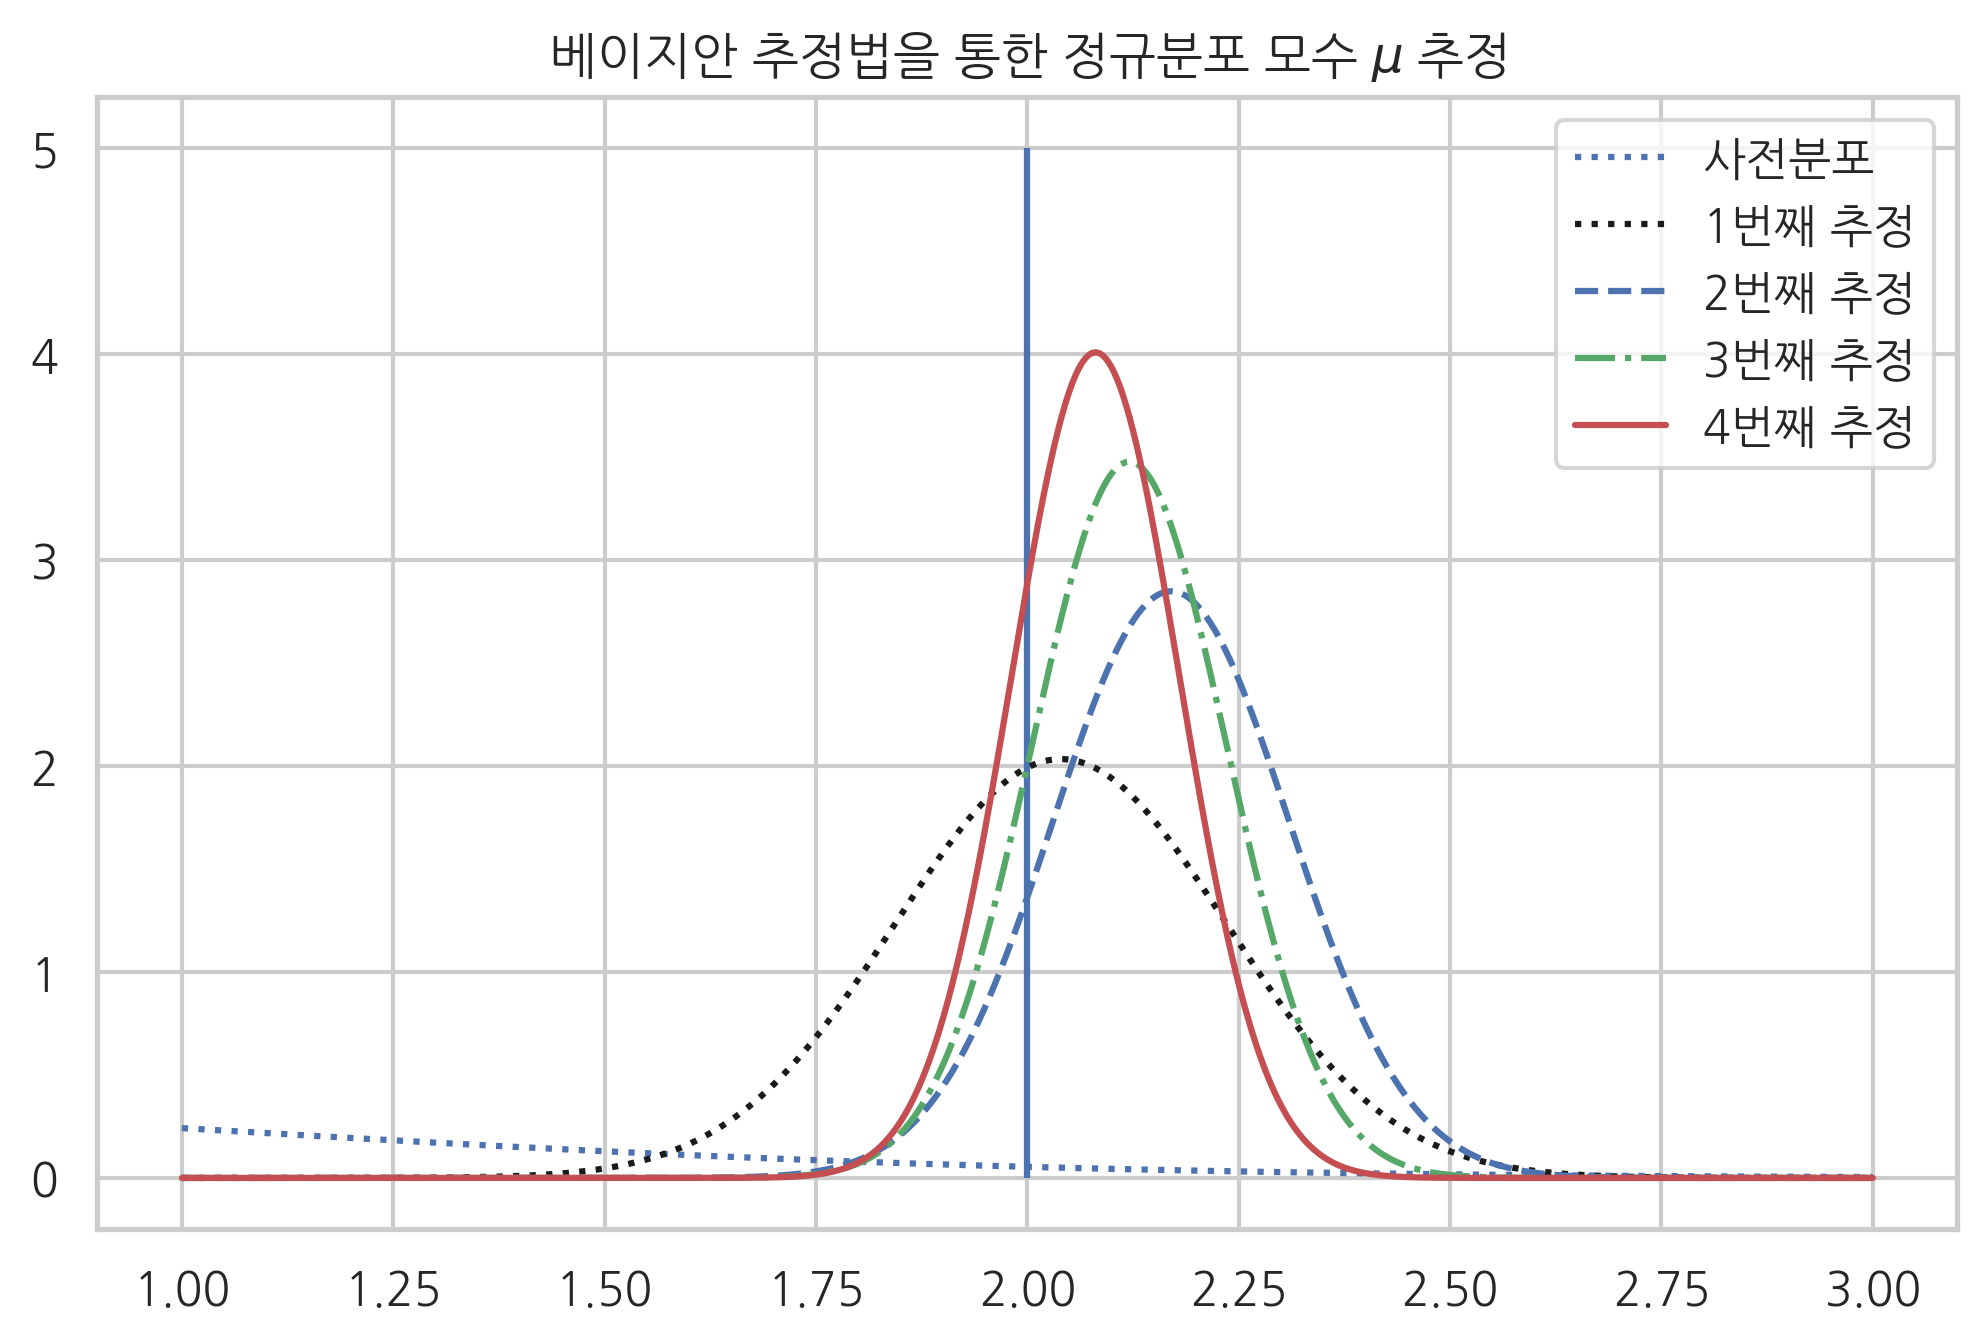

In [55]:
# 100개 씩 총 4번 데이터 얻어서 기댓값 모수를 추정해보자. 
target_mu = 2
target_sigma2 = 4

mu = 0
sigma2 = 1

xx = np.linspace(1,3,10000)
plt.plot(xx, sp.stats.norm(mu, np.sqrt(sigma2)).pdf(xx), ls=':', c='b', label='사전분포')

ls = [':', '--', '-.', '-']
color= ['k', 'b', 'g', 'r']
np.random.seed(1)

for i in np.arange(4) : 
    sample = sp.stats.norm(target_mu, np.sqrt(target_sigma2)).rvs(100)
    mu = target_sigma2/(100*sigma2+target_sigma2)*mu + 100*sigma2/(100*sigma2+target_sigma2)*np.mean(sample)
    sigma2 = 1/(1/sigma2+100/target_sigma2)
    plt.plot(xx, sp.stats.norm(loc=mu, scale=np.sqrt(sigma2)).pdf(xx), ls=ls[i], c=color[i], label=f'{i+1}번째 추정')
    print(f'{i+1}번째 추정 모드 : mode = {mu}')
plt.legend()
plt.title(f'베이지안 추정법을 통한 정규분포 모수 $\mu$ 추정')
plt.vlines(target_mu, ymin=0, ymax=5)



In [64]:
# 9.3.2 연습문제 
from sklearn.datasets import load_iris

x = load_iris().data
df = pd.DataFrame(x, columns=load_iris().feature_names)
df[['sepal length (cm)']]

,sepal length (cm)
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0
...,...
145,6.7
146,6.3
147,6.5
148,6.2


Text(0.5, 1.0, 'sepal length (cm)')

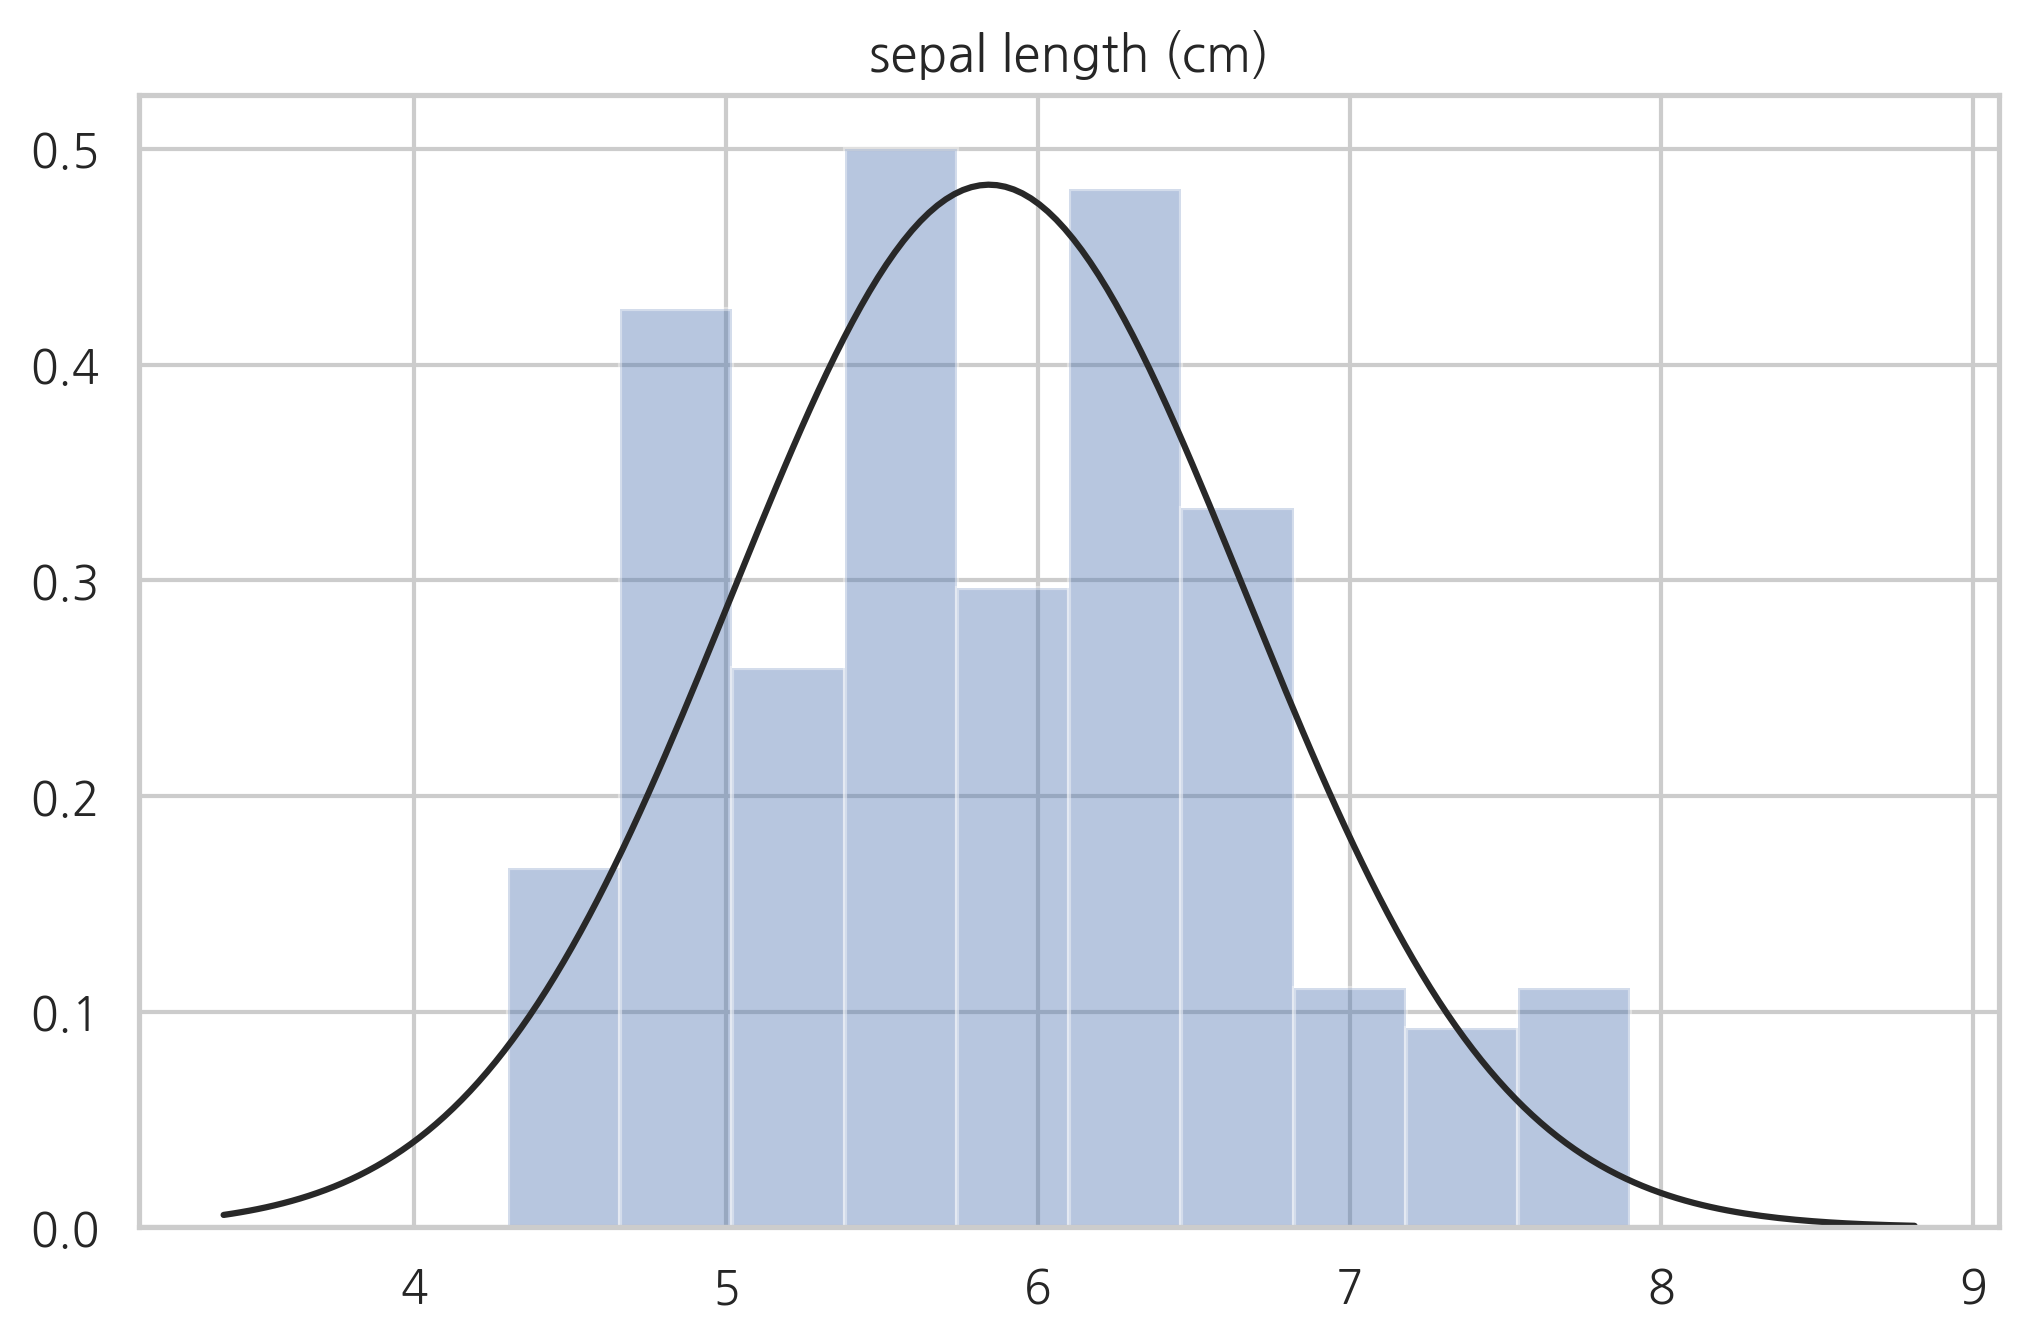

In [93]:
sns.distplot(df['sepal length (cm)'].values, kde=False, bins=10, fit=sp.stats.norm)
plt.title('sepal length (cm)')

추정된 정규분포 기댓값 모수 : 5.821293800799196
모멘트방법으로 추정한 정규분포 기댓값 모수 : 5.843333333333334


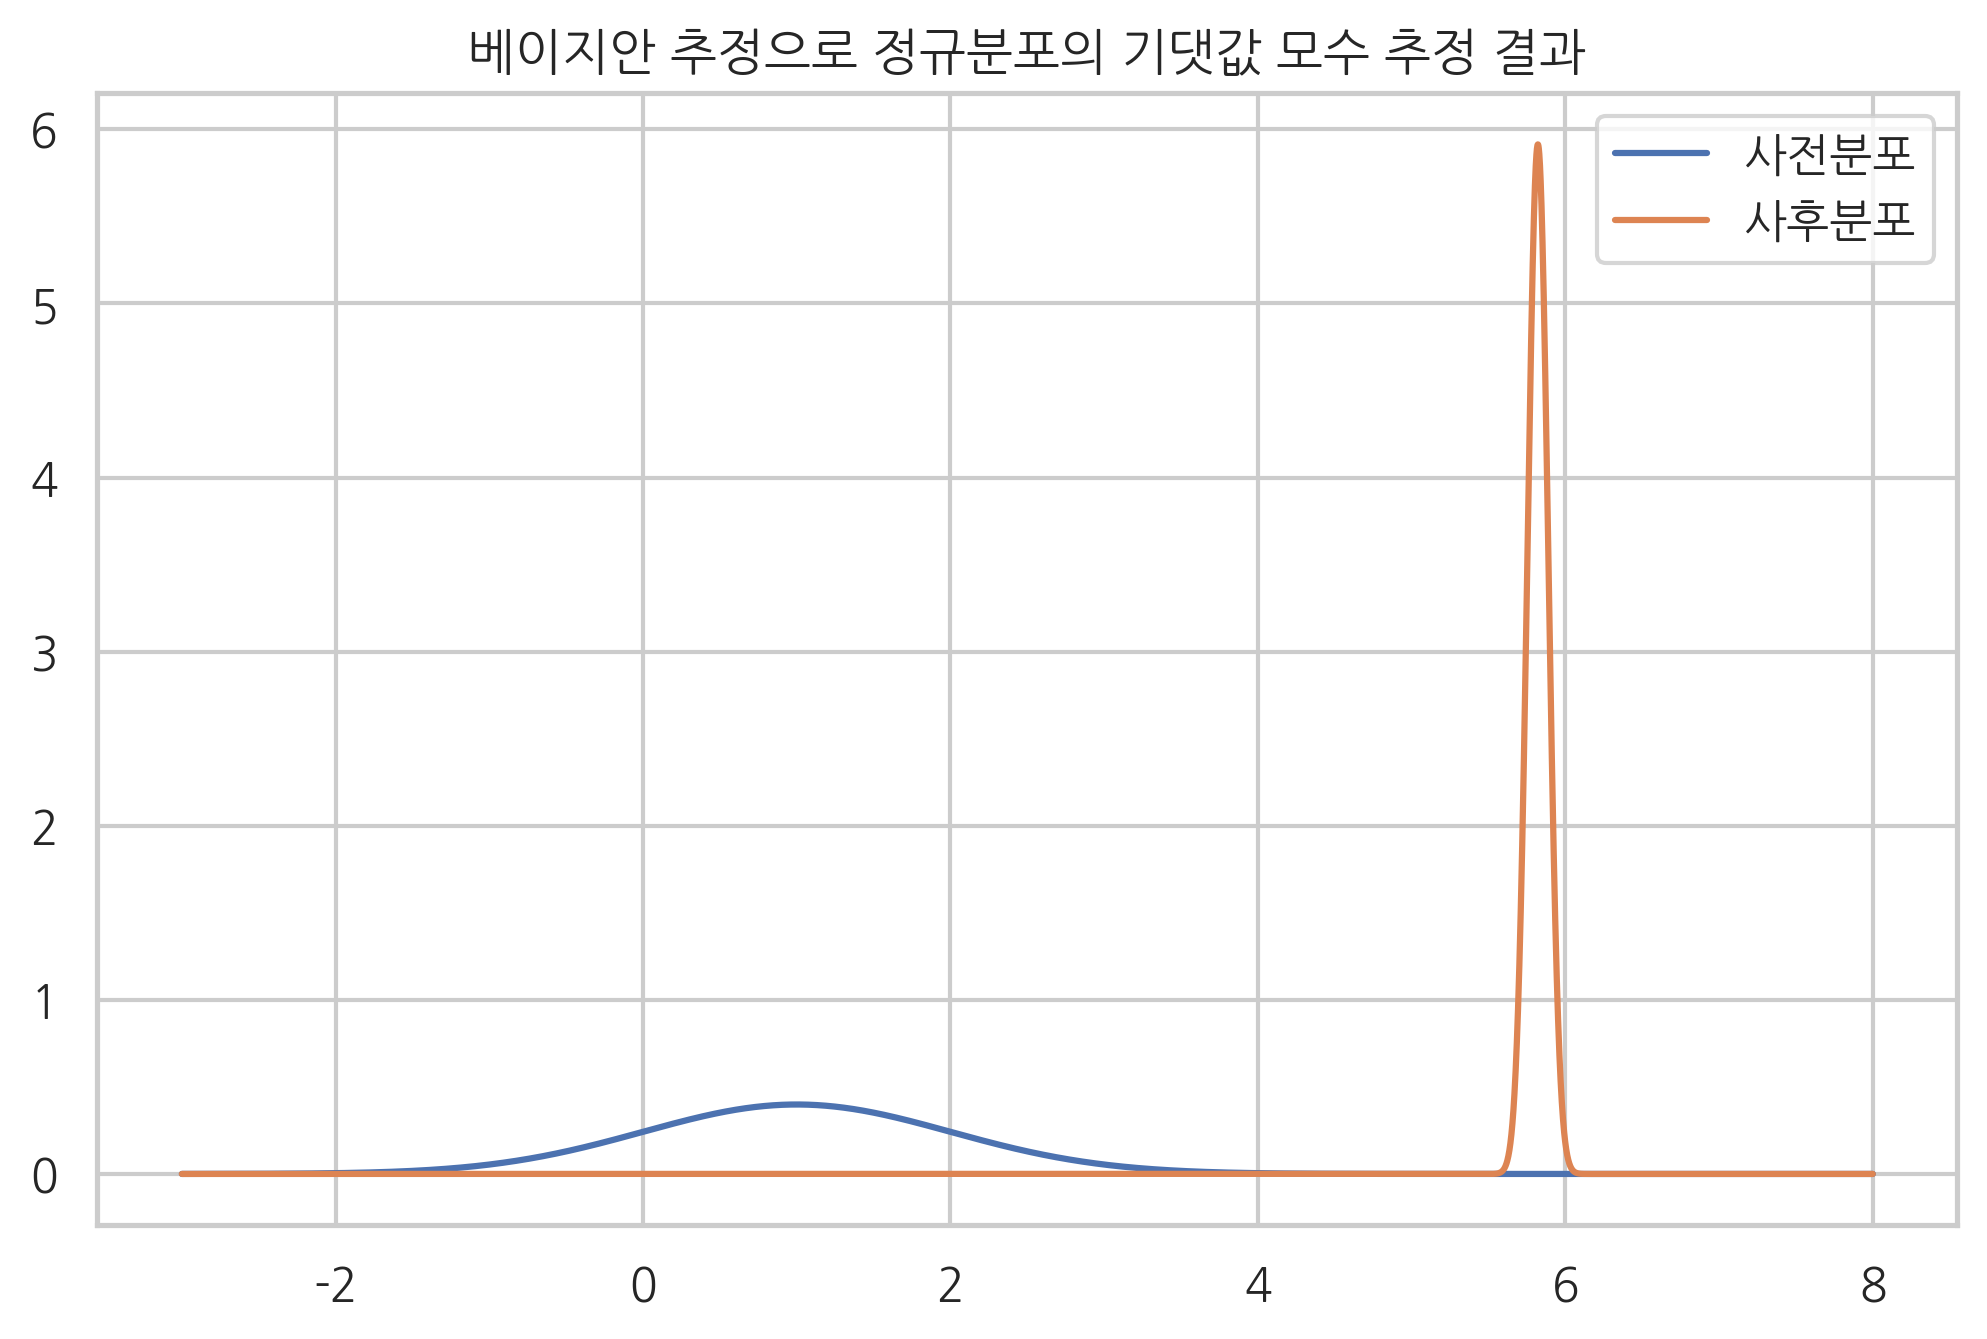

In [95]:
mu = 1
sigma2 = 1

xx = np.linspace(-3,8,10000)
plt.plot(xx, sp.stats.norm(mu, sigma2).pdf(xx), label='사전분포')

target_sigma2 = np.var(df['sepal length (cm)'].values, ddof=1)
data = df['sepal length (cm)'].values

mu1 = target_sigma2/(len(data)*mu+target_sigma2)*mu+len(data)*sigma2/(len(data)*sigma2+target_sigma2)*np.mean(data)
sigma21 = 1/(1/sigma2+len(data)/target_sigma2)

plt.plot(xx, sp.stats.norm(loc=mu1, scale=np.sqrt(sigma21)).pdf(xx), label='사후분포')
plt.legend()
plt.title('베이지안 추정으로 정규분포의 기댓값 모수 추정 결과')
print(f'추정된 정규분포 기댓값 모수 : {mu1}')
print(f'모멘트방법으로 추정한 정규분포 기댓값 모수 : {np.mean(data)}')
plt.show()


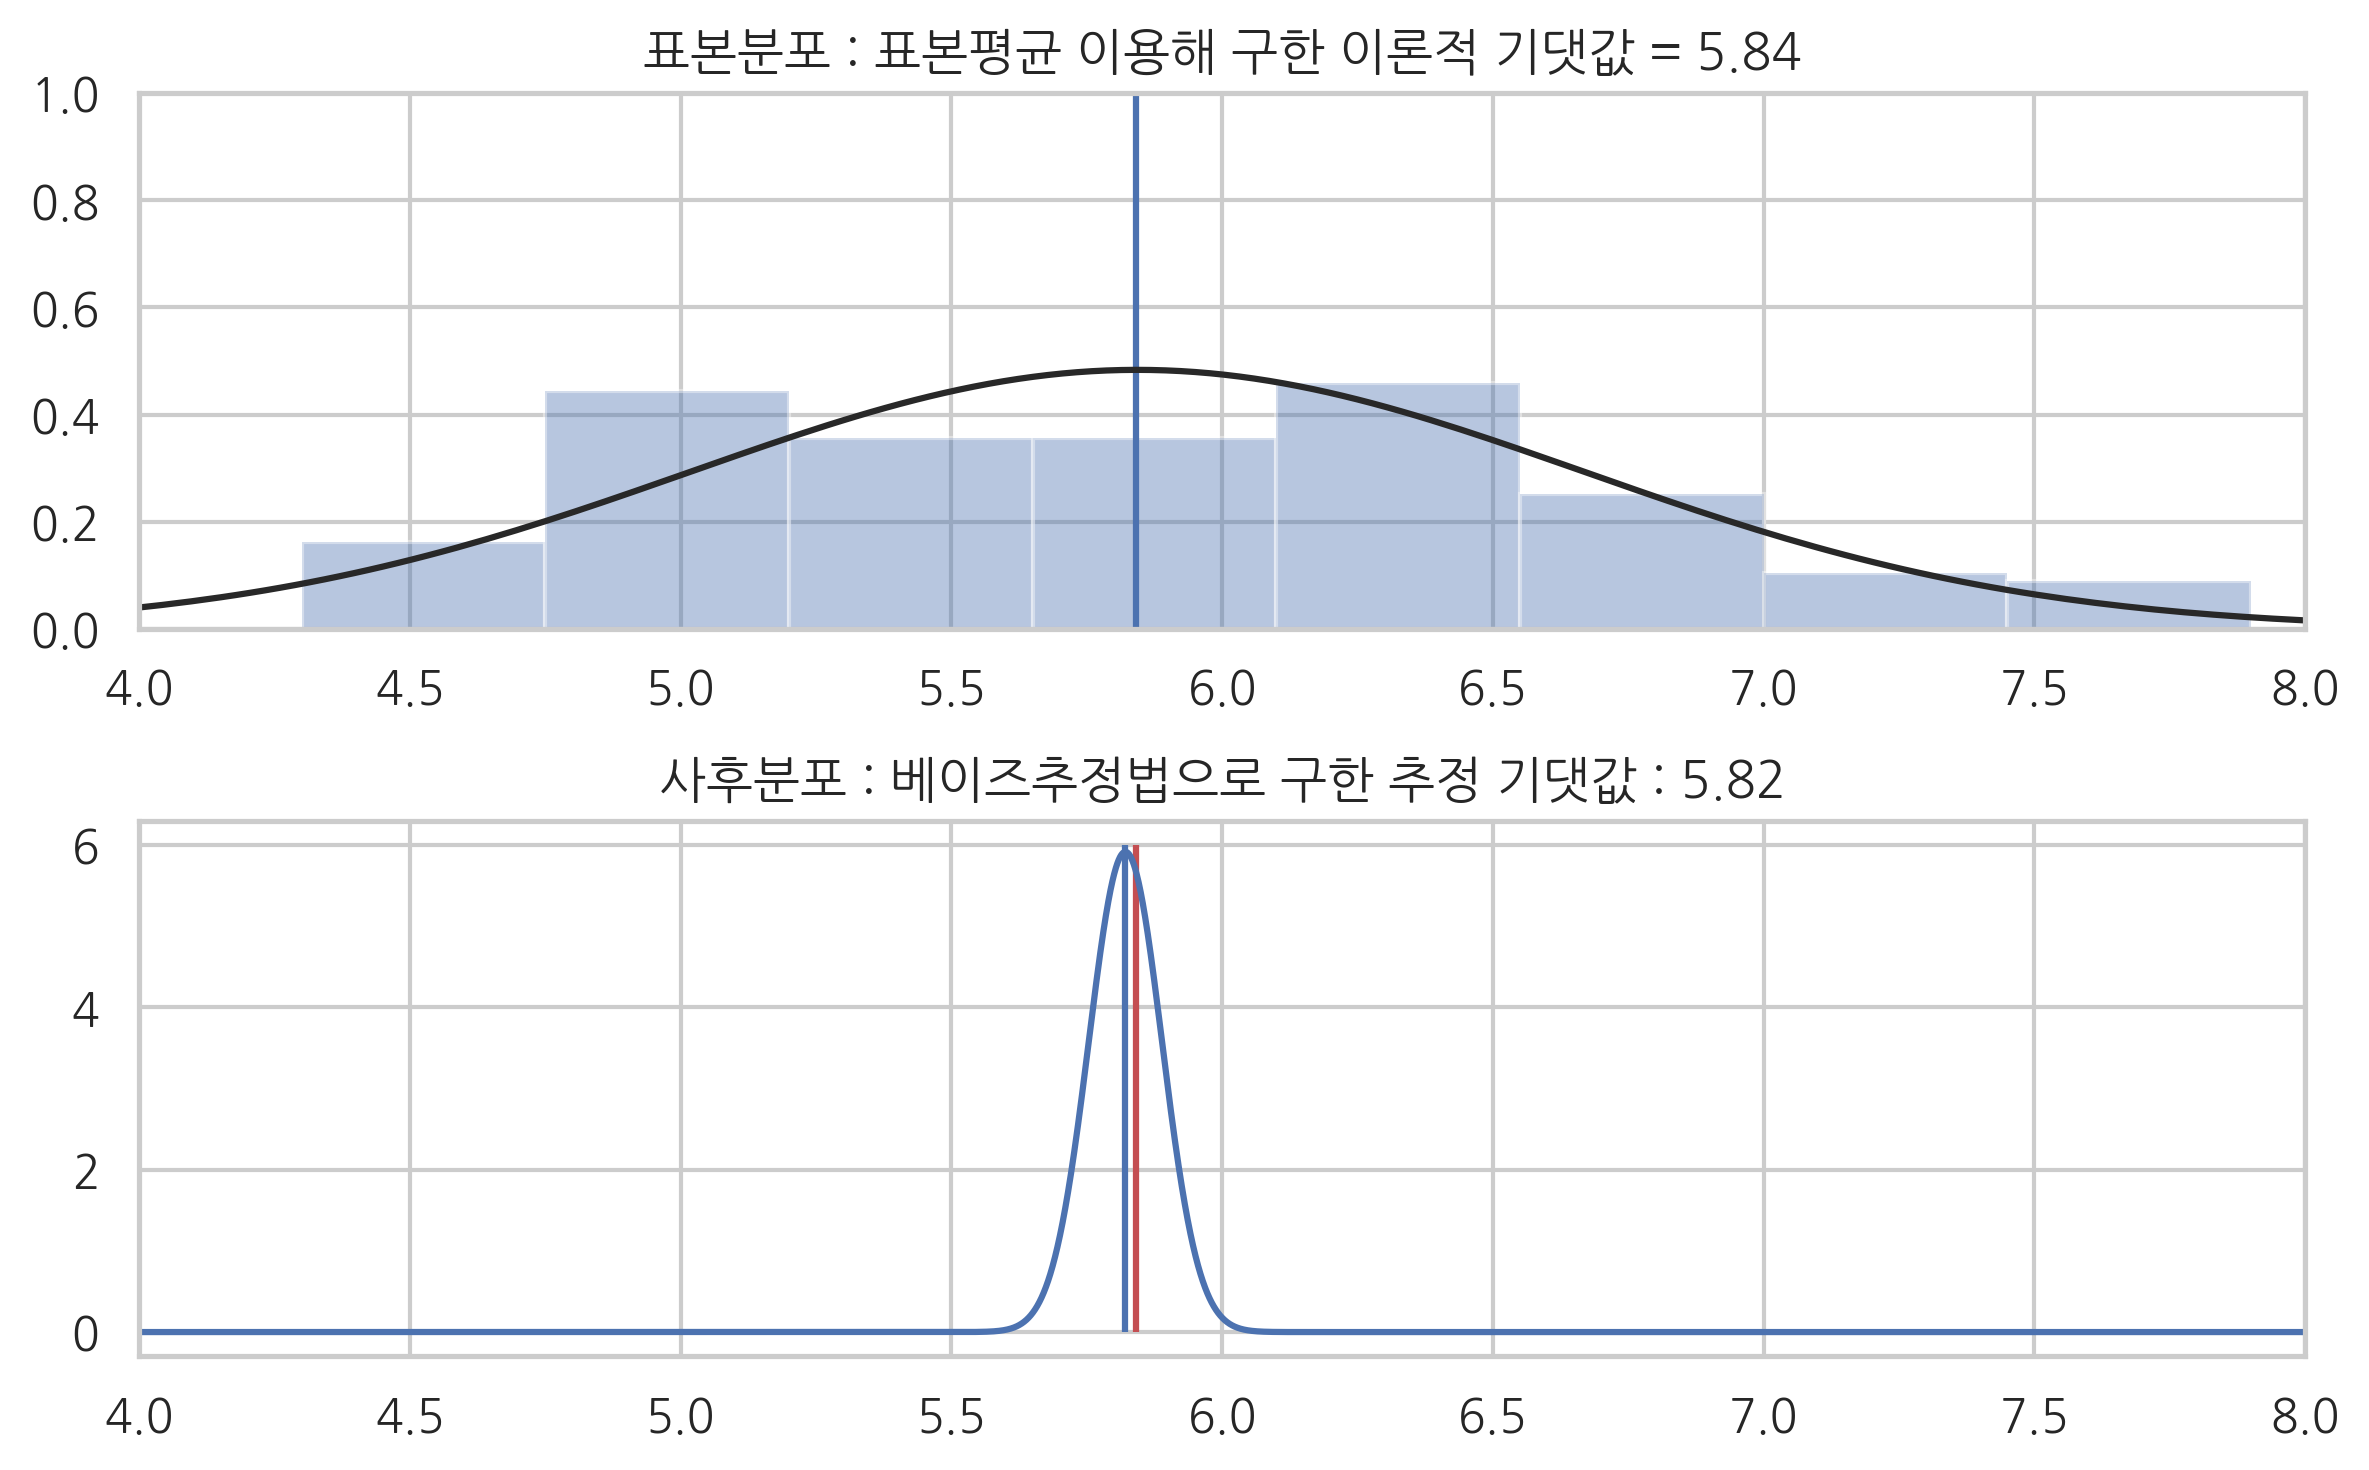

In [117]:
plt.subplot(211)
sns.distplot(data, kde=False, fit=sp.stats.norm)
plt.title(f'표본분포 : 표본평균 이용해 구한 이론적 기댓값 = 5.84')
plt.vlines(5.84, ymin=0, ymax=1)
plt.ylim(0,1)
plt.xlim(4,8)


mu = 1
sigma2 = 1

xx = np.linspace(4,8,10000)

target_sigma2 = np.var(df['sepal length (cm)'].values, ddof=1)
data = df['sepal length (cm)'].values

mu1 = target_sigma2/(len(data)*mu+target_sigma2)*mu+len(data)*sigma2/(len(data)*sigma2+target_sigma2)*np.mean(data)
sigma21 = 1/(1/sigma2+len(data)/target_sigma2)

plt.subplot(212)
plt.vlines(5.84, ymin=0, ymax=6, colors='r')
plt.vlines(5.82, ymin=0, ymax=6, colors='b')
plt.plot(xx, sp.stats.norm(loc=mu1, scale=np.sqrt(sigma21)).pdf(xx))
plt.xlim(4,8)
plt.title(f'사후분포 : 베이즈추정법으로 구한 추정 기댓값 : 5.82')
plt.tight_layout()
plt.show()


# 추정해 낸 결과

기댓값 : 5.82, 분산 : 0.0046


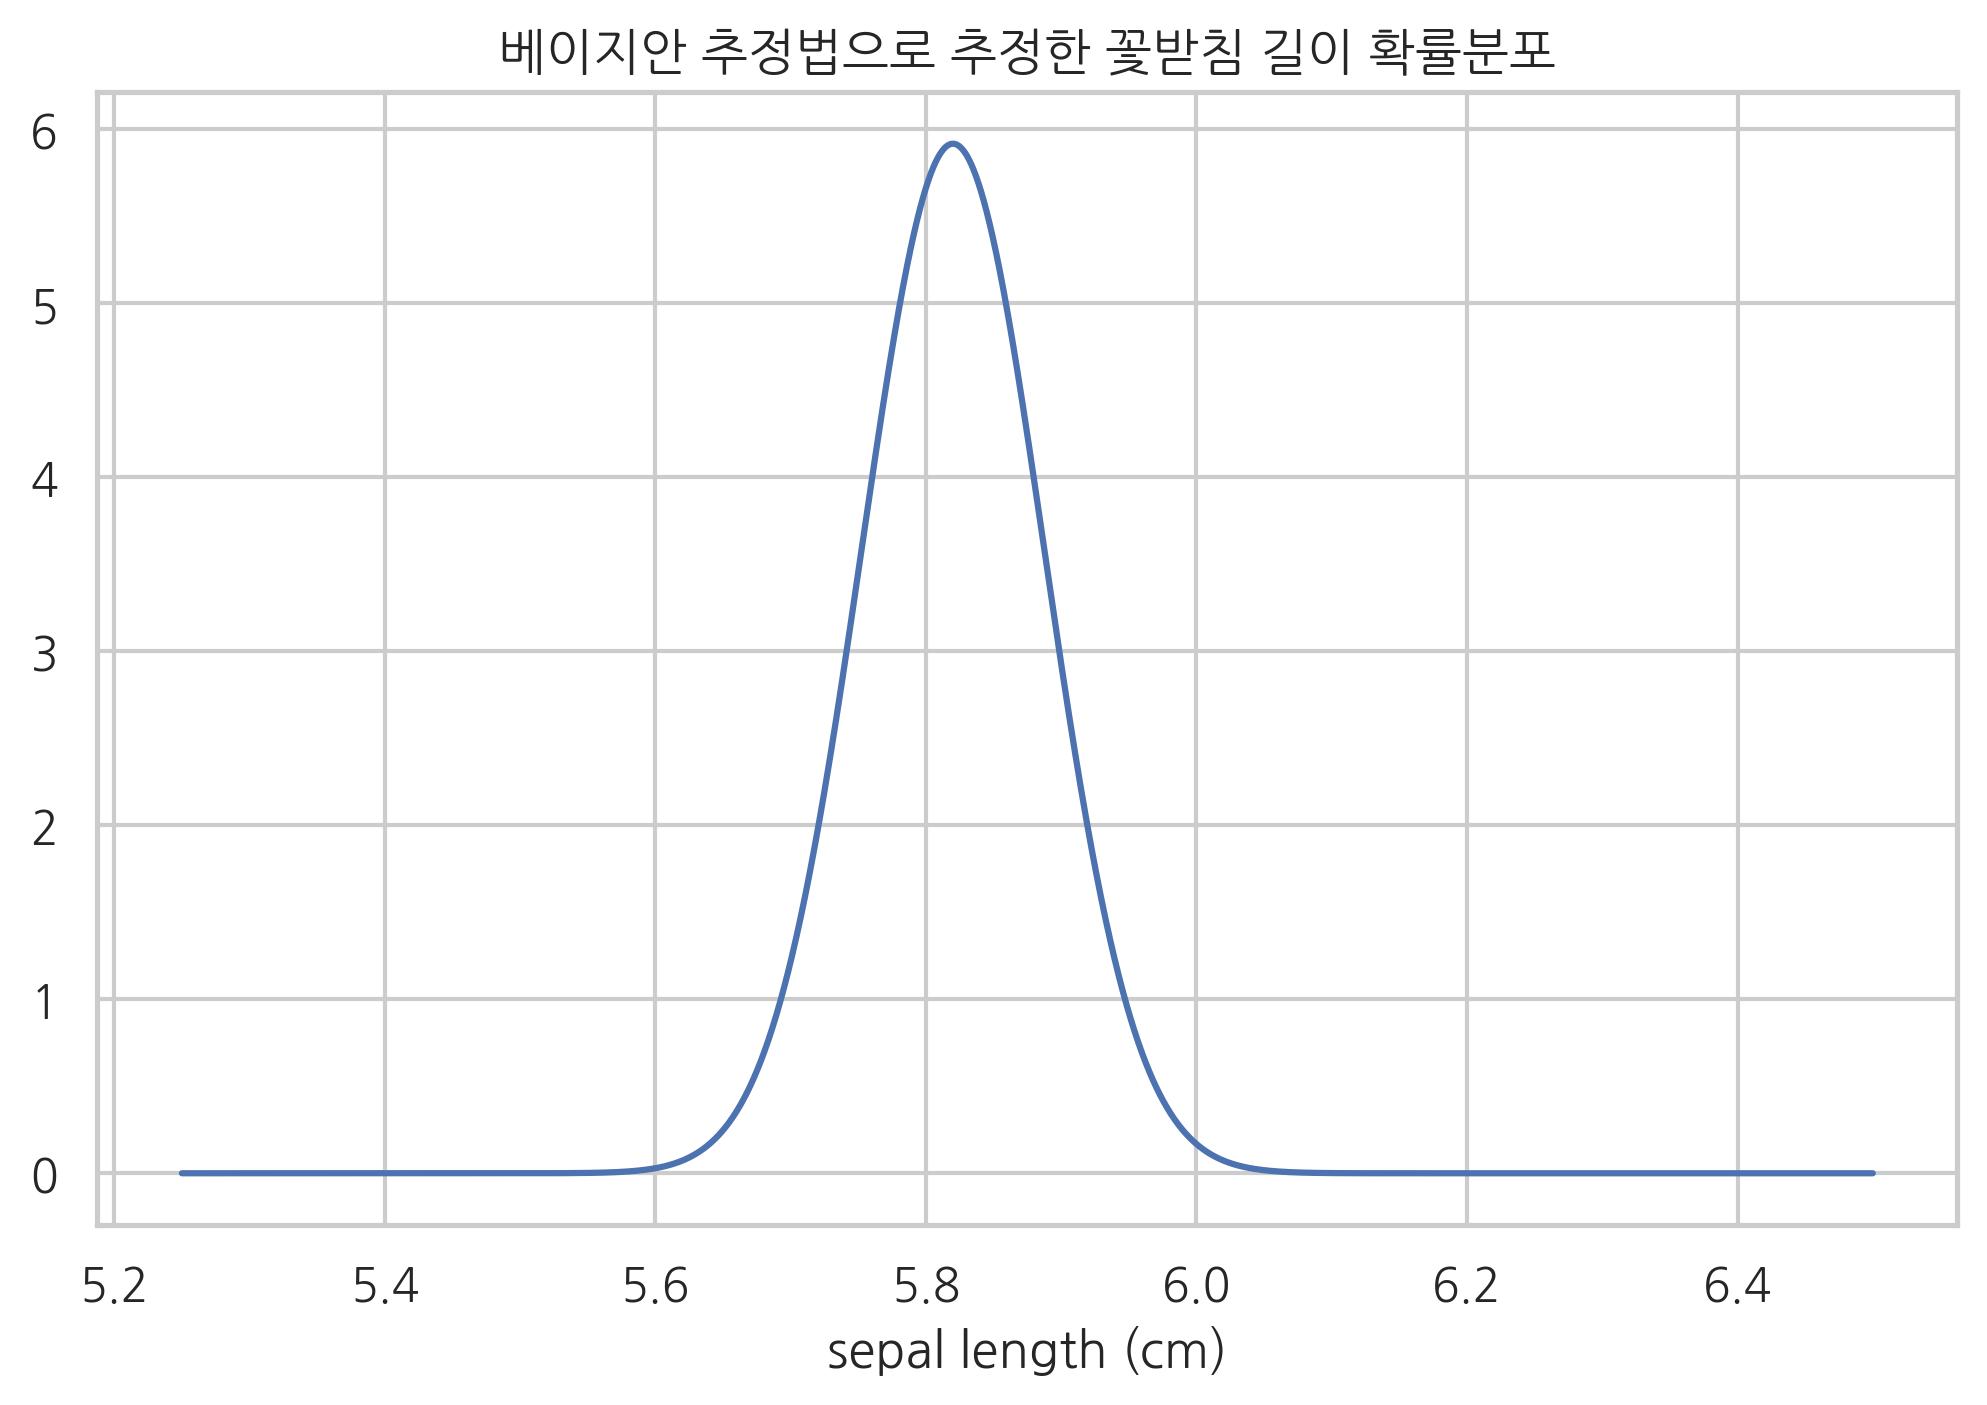

In [129]:
xx = np.linspace(5.25,6.5,10000)

mu = 5.82 # 베이지안추정법으로 구해낸, 가장 가능성 높은 모수 
plt.plot(xx, sp.stats.norm(loc=mu, scale=np.sqrt(sigma21)).pdf(xx))
plt.title('베이지안 추정법으로 추정한 꽃받침 길이 확률분포')
print('기댓값 : {}, 분산 : {}'.format(mu, np.round(sigma21, 4)))
plt.xlabel('sepal length (cm)')
plt.show()

<AxesSubplot:xlabel='sepal length (cm)'>

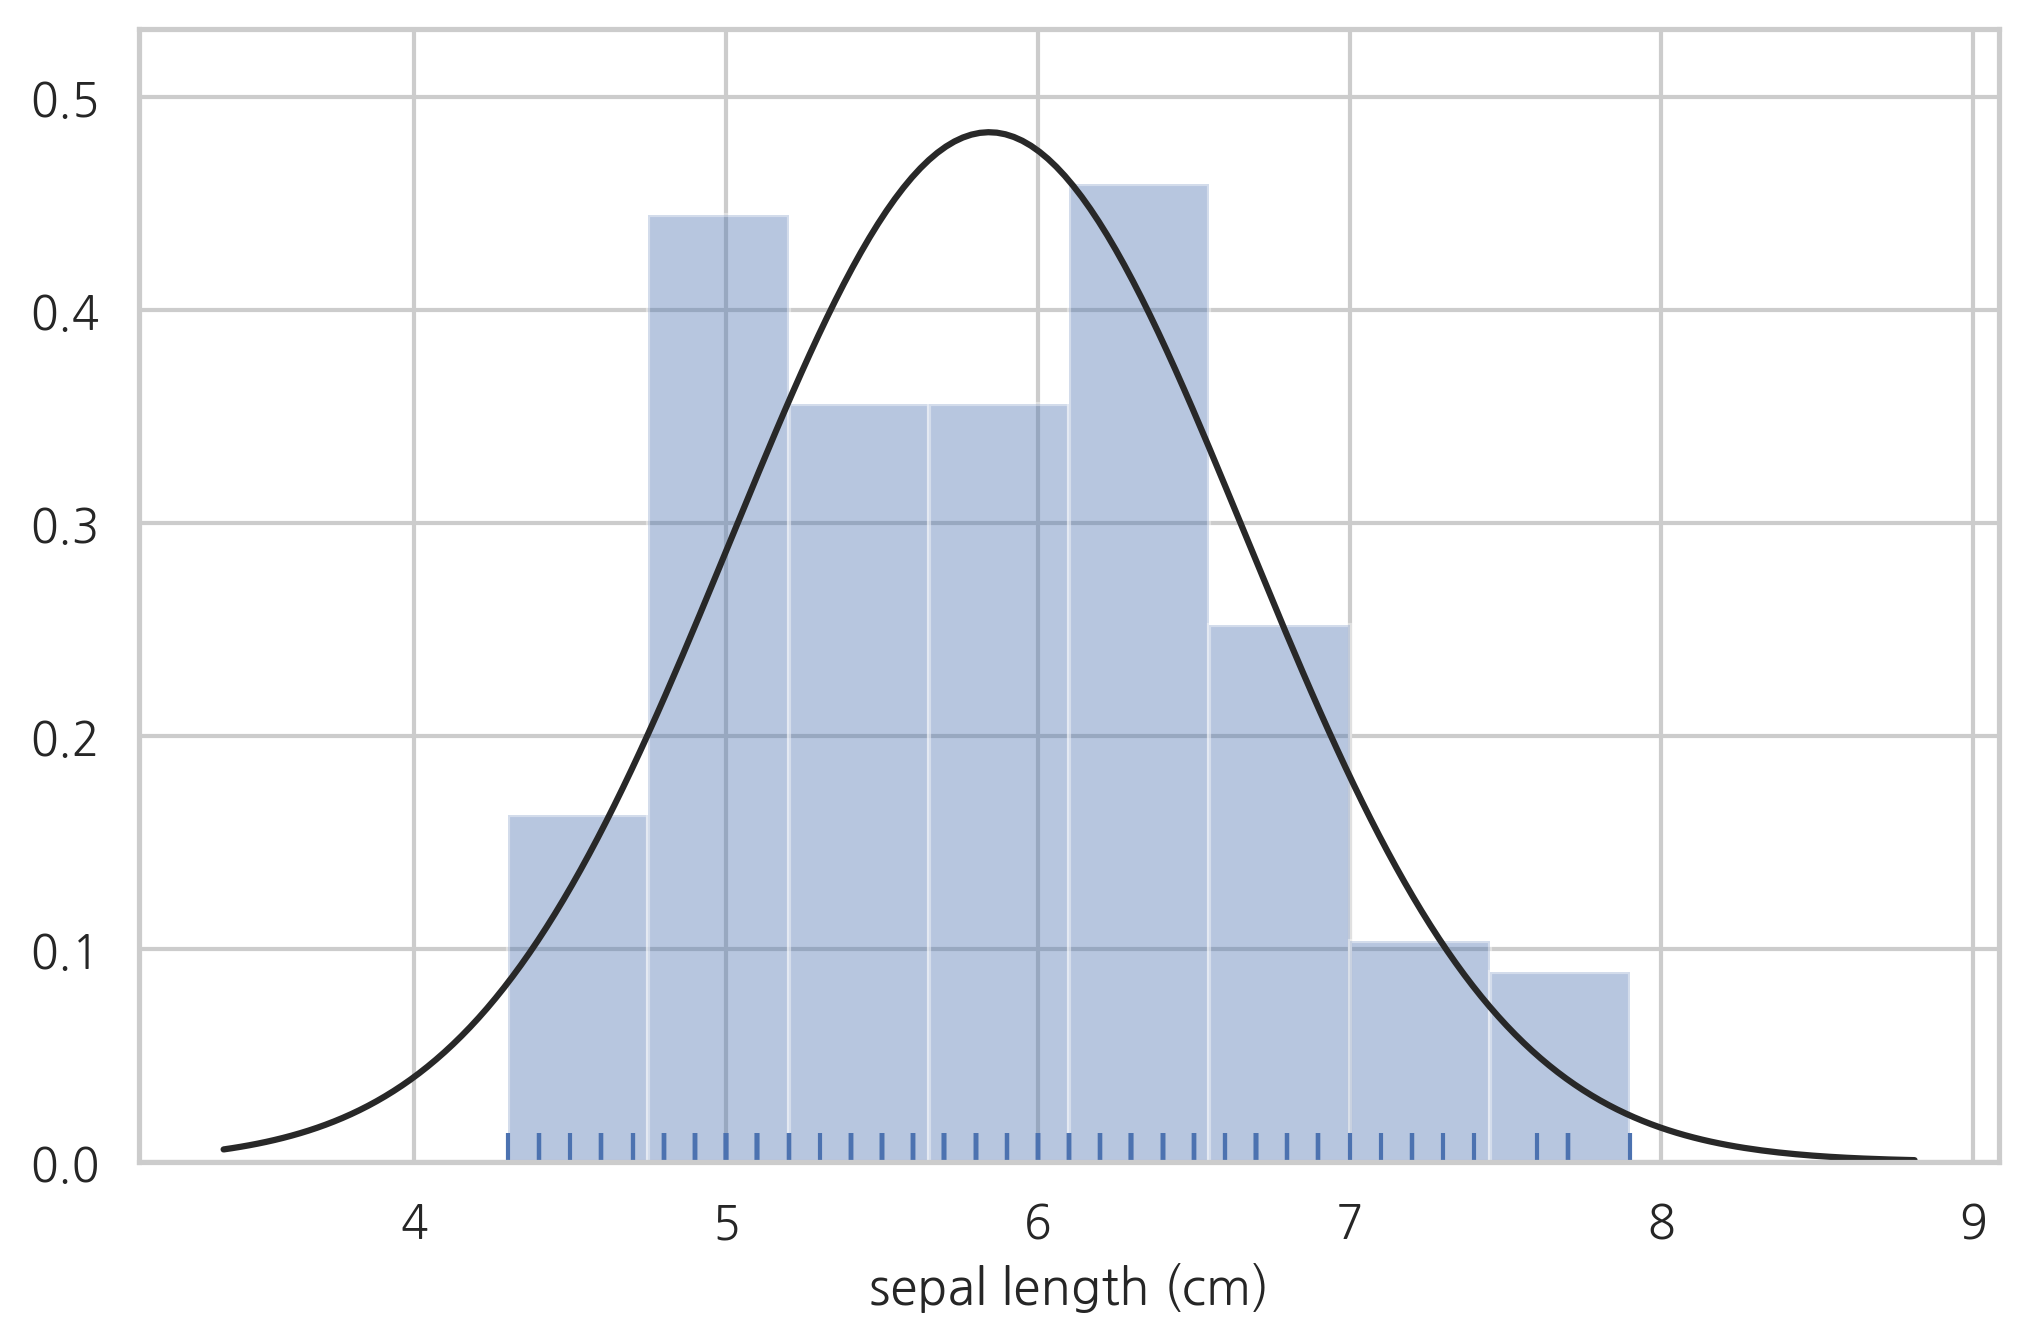

In [141]:
sns.distplot(df['sepal length (cm)'], rug=True, fit=sp.stats.norm, kde=False)

# 검정과 유의확률

mode : 0.8


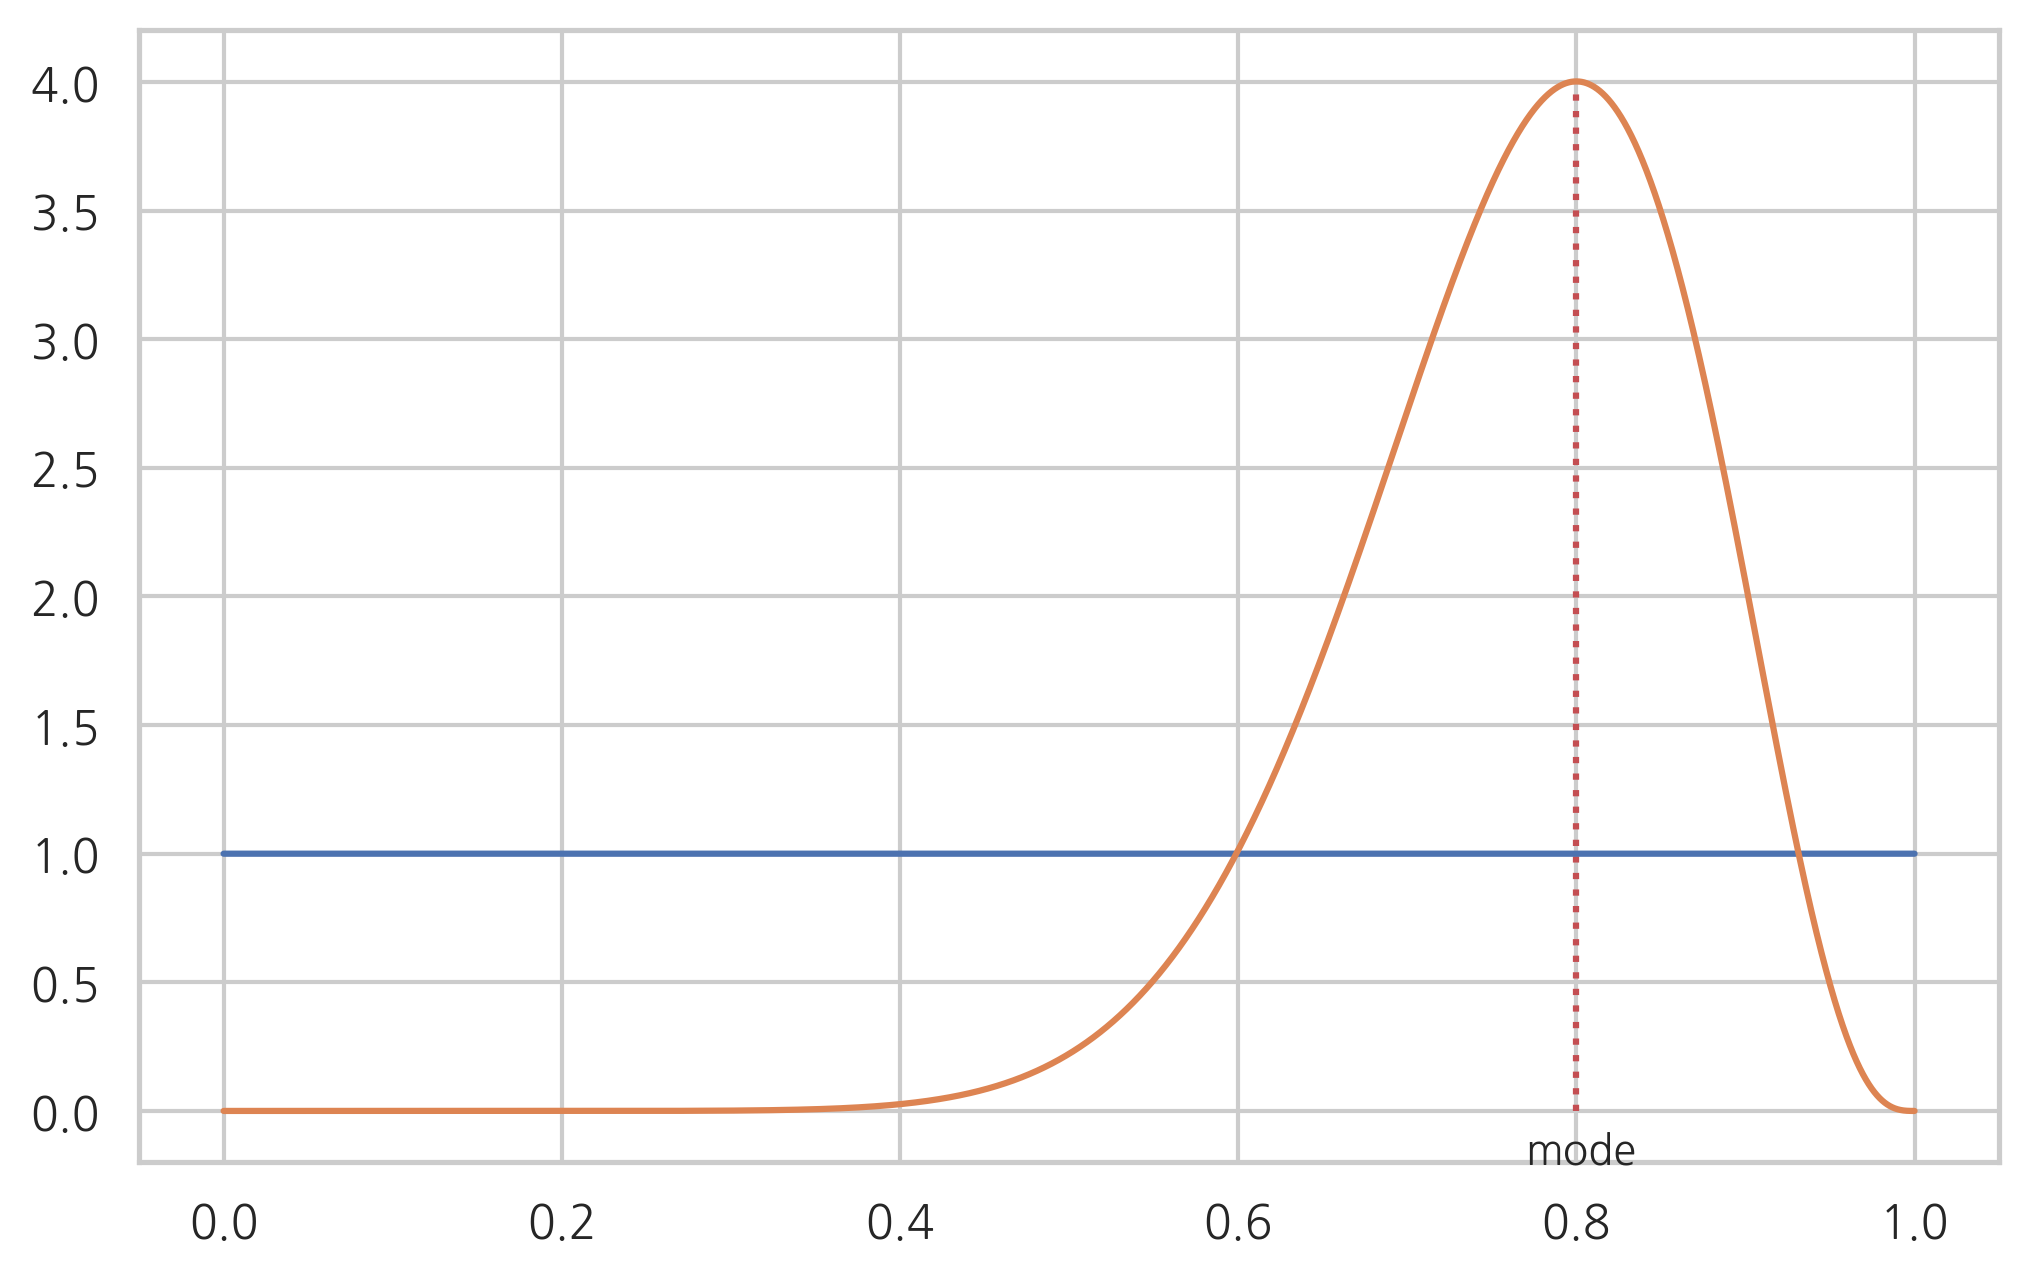

In [157]:
# 동전 15번 던져 12번 앞면 나왔다. 공정한 동전이라 할 수 있나? 
# 베이즈 추정법으로 찾은 베르누이 확률변수 모수 
a0 = 1
b0 = 1

a1 = 13
b1 = 4

xx = np.linspace(0,1,10000)
plt.plot(xx, sp.stats.beta(a0,b0).pdf(xx))

plt.plot(xx, sp.stats.beta(a1,b1).pdf(xx))
mode = 12/15
print(f'mode : {mode}')
plt.vlines(mode, ymin=0, ymax=4, color='r', ls=':')
plt.text(0.77, -0.2, 'mode')
plt.show()

# 유의확률

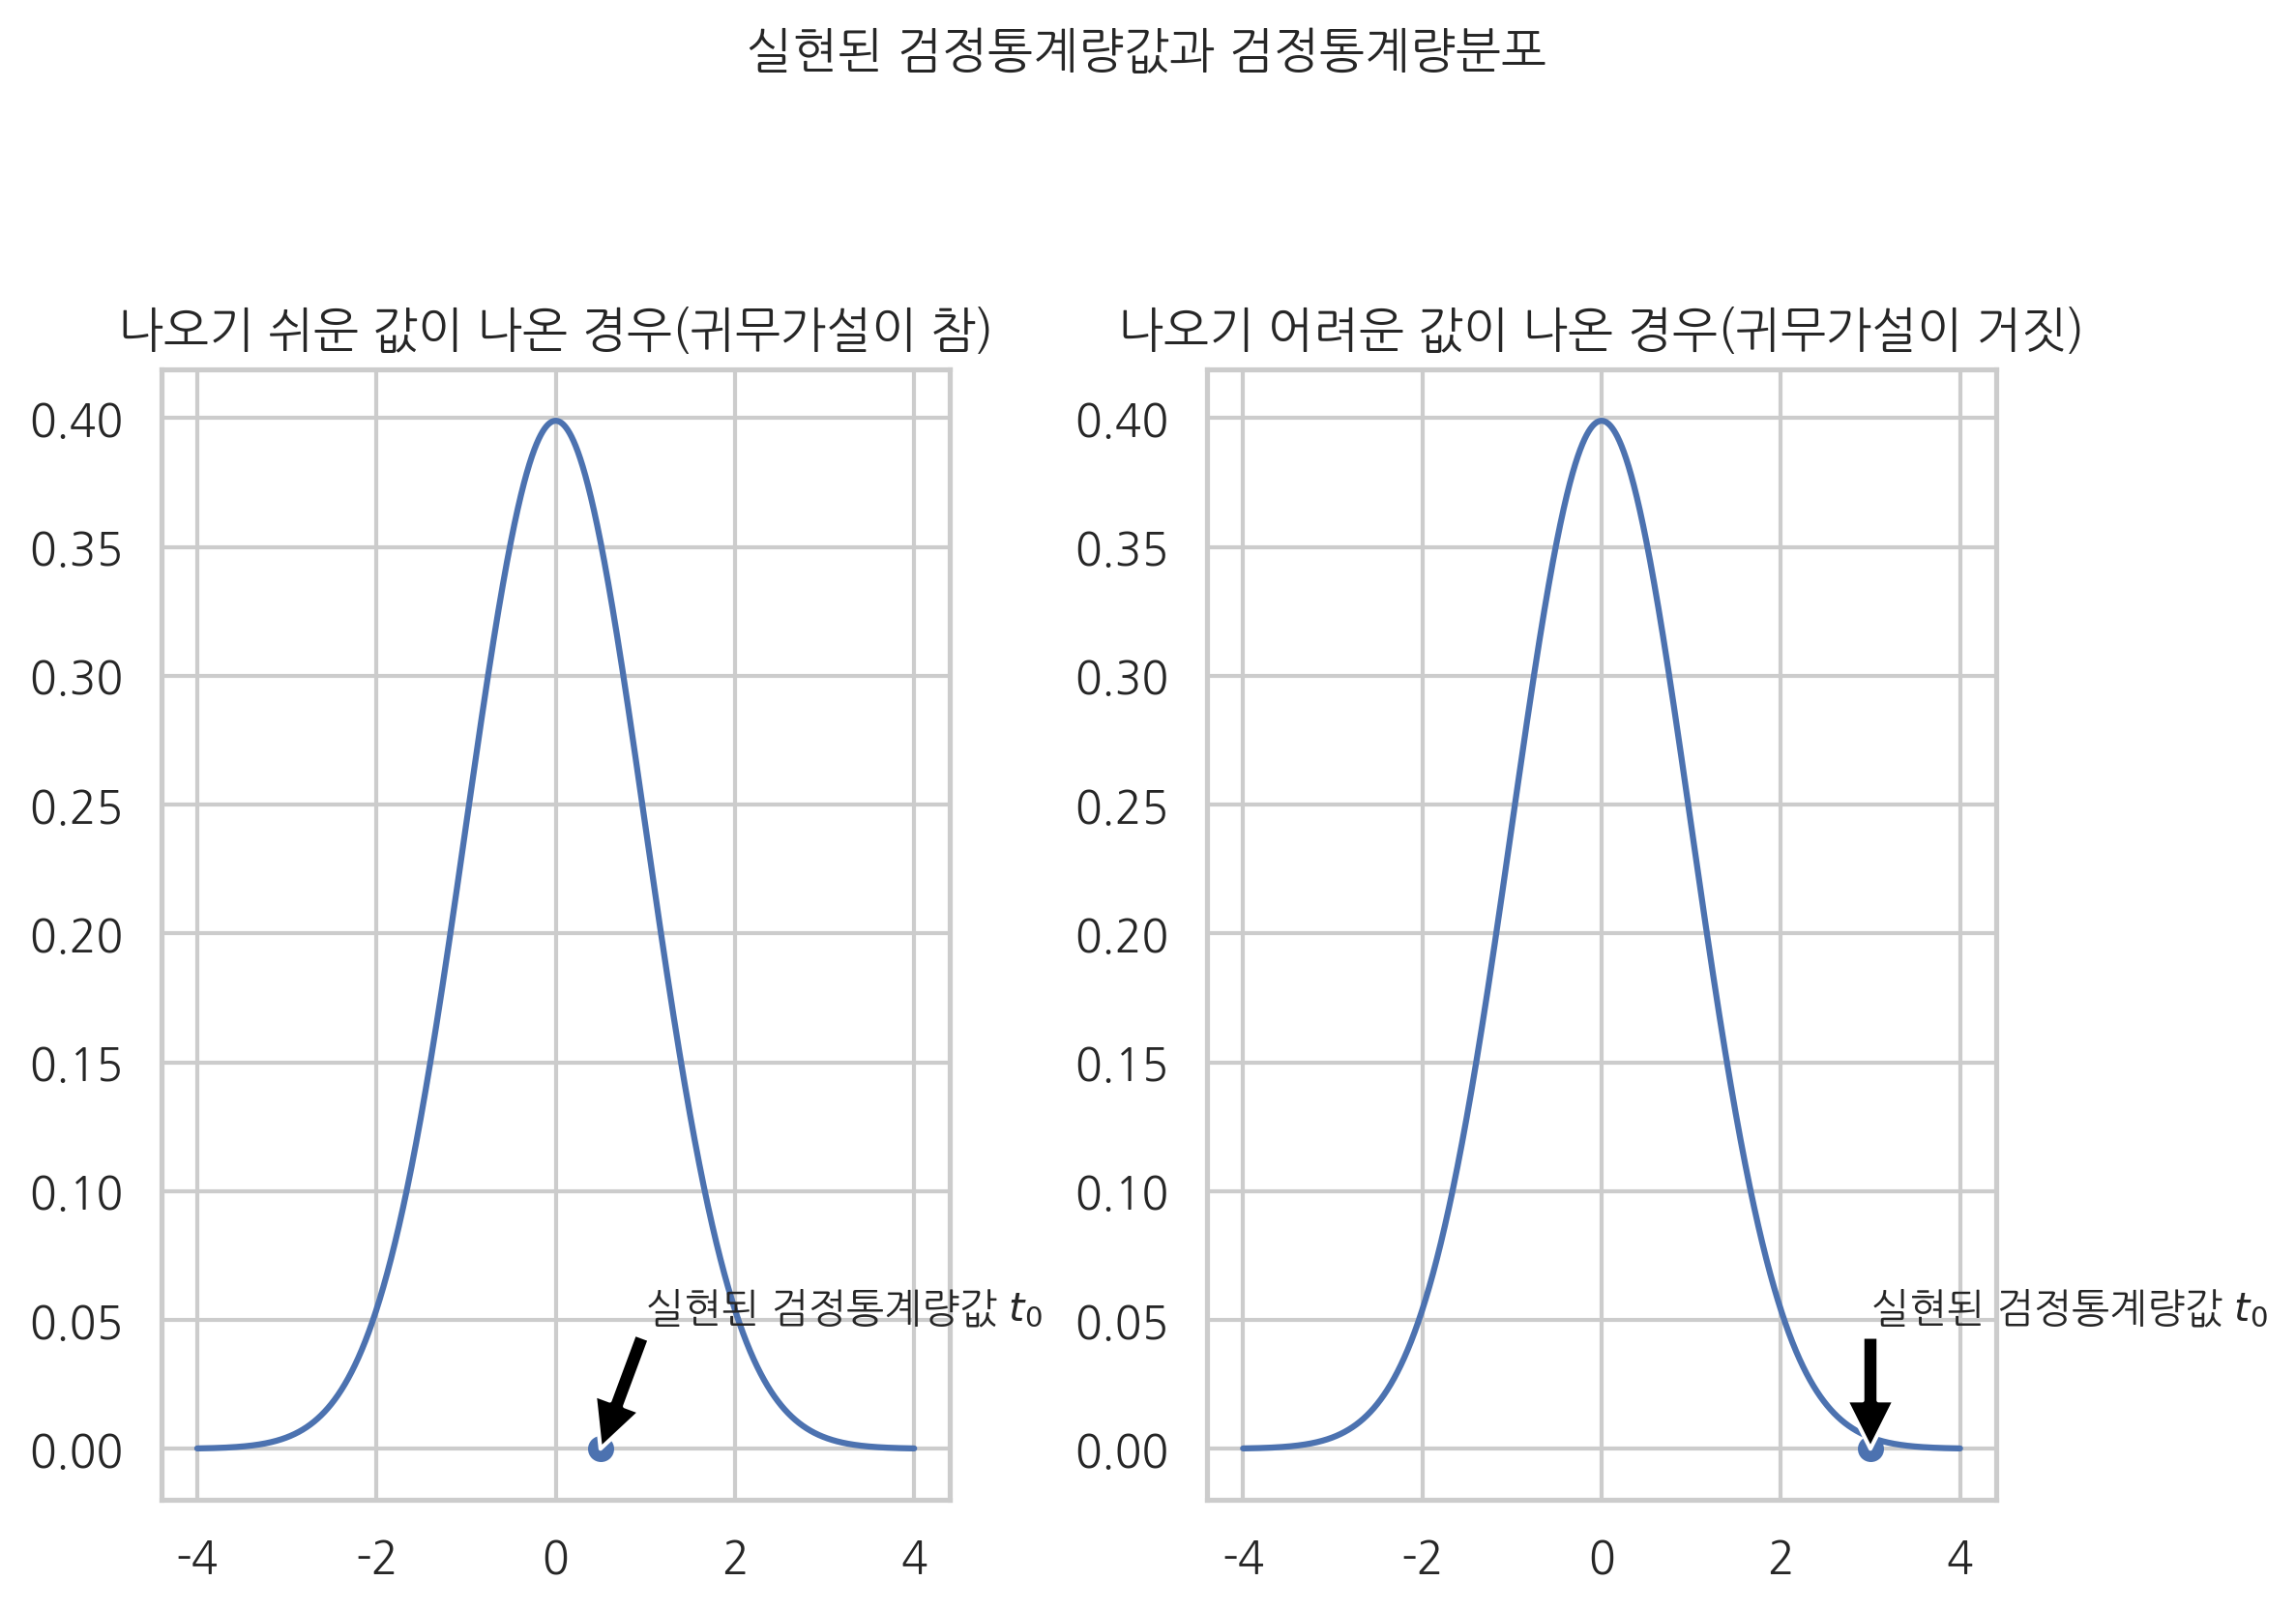

In [180]:
xx = np.linspace(-4,4,10000)

black = {'facecolor' : 'black'}

plt.subplot(121)
plt.title('나오기 쉬운 값이 나온 경우(귀무가설이 참)')
plt.plot(xx, sp.stats.norm().pdf(xx))
plt.annotate('실현된 검정통계량값 $t_{0}$', xy=[0.5,0],xytext=[1,0.05], arrowprops=black)
plt.scatter(0.5,0,30)

plt.subplot(122)
plt.title('나오기 어려운 값이 나온 경우(귀무가설이 거짓)')
plt.plot(xx, sp.stats.norm().pdf(xx))
plt.scatter(3,0,30)
plt.annotate('실현된 검정통계량값 $t_{0}$', xy=[3,0], xytext=[3,0.05], arrowprops=black)

plt.suptitle('실현된 검정통계량값과 검정통계량분포', y=1.1)
plt.tight_layout()
plt.show()

# 예를 통해 직접 검정해보자. 

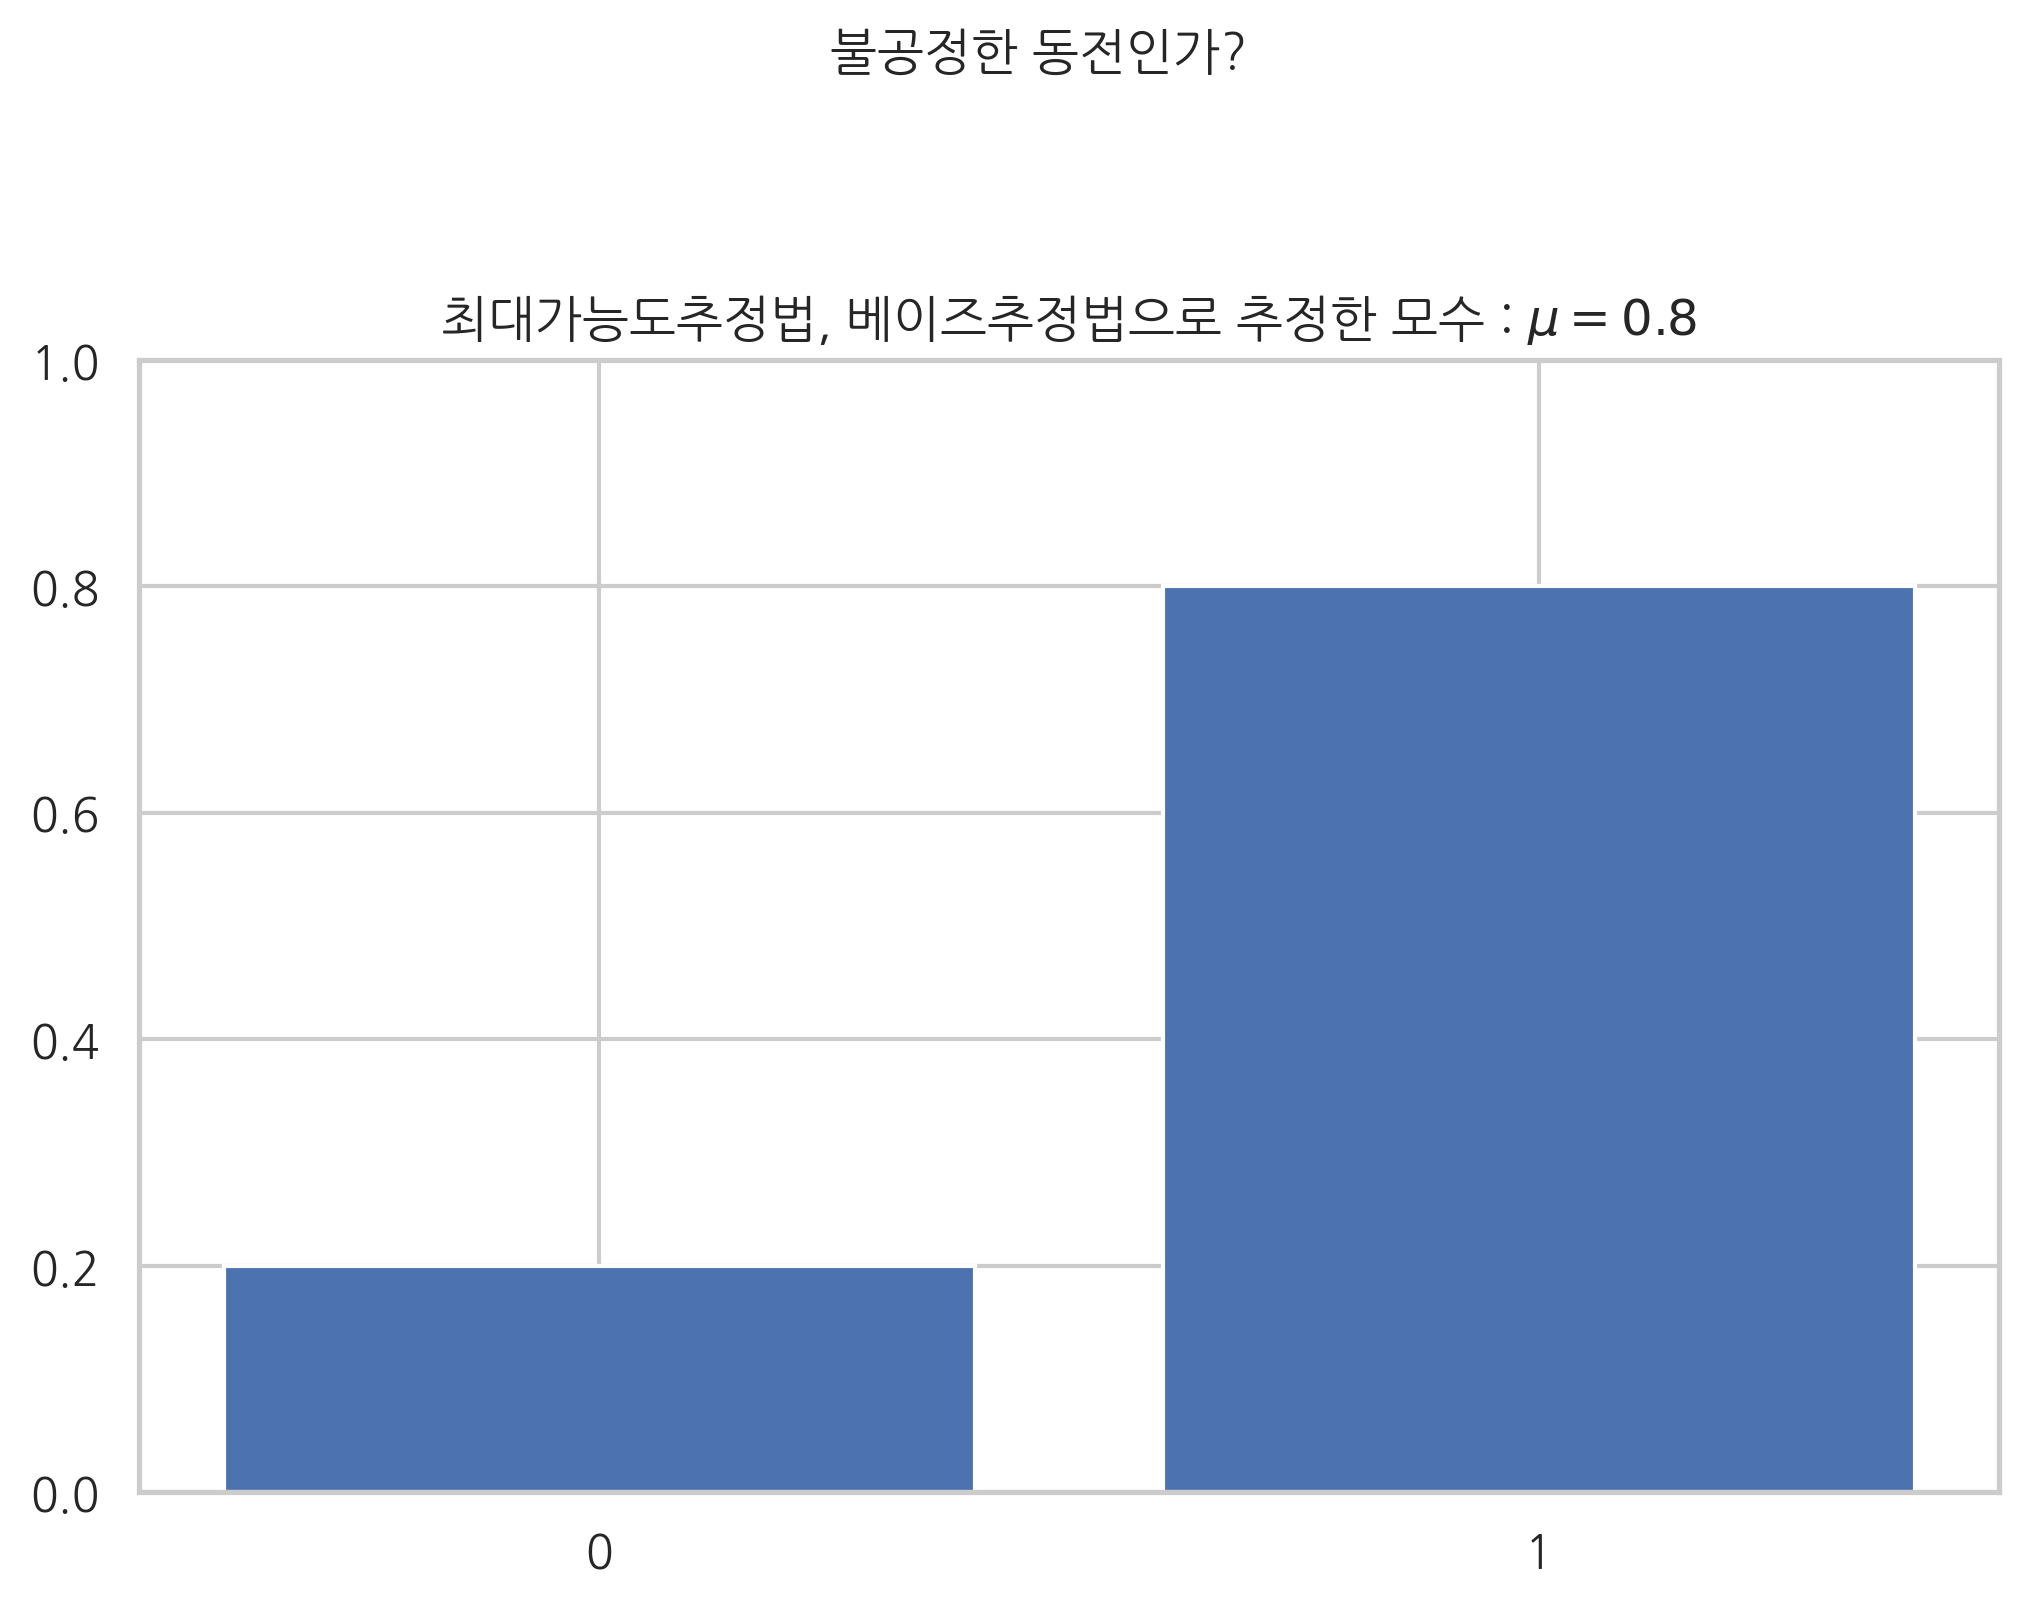

In [196]:
plt.bar([0,1], sp.stats.bernoulli(0.8).pmf([0,1]))
plt.xticks([0,1])
plt.title('최대가능도추정법, 베이즈추정법으로 추정한 모수 : $\mu = 0.8$')
plt.suptitle('불공정한 동전인가?', y=1.1)
plt.ylim(0,1)
plt.show()

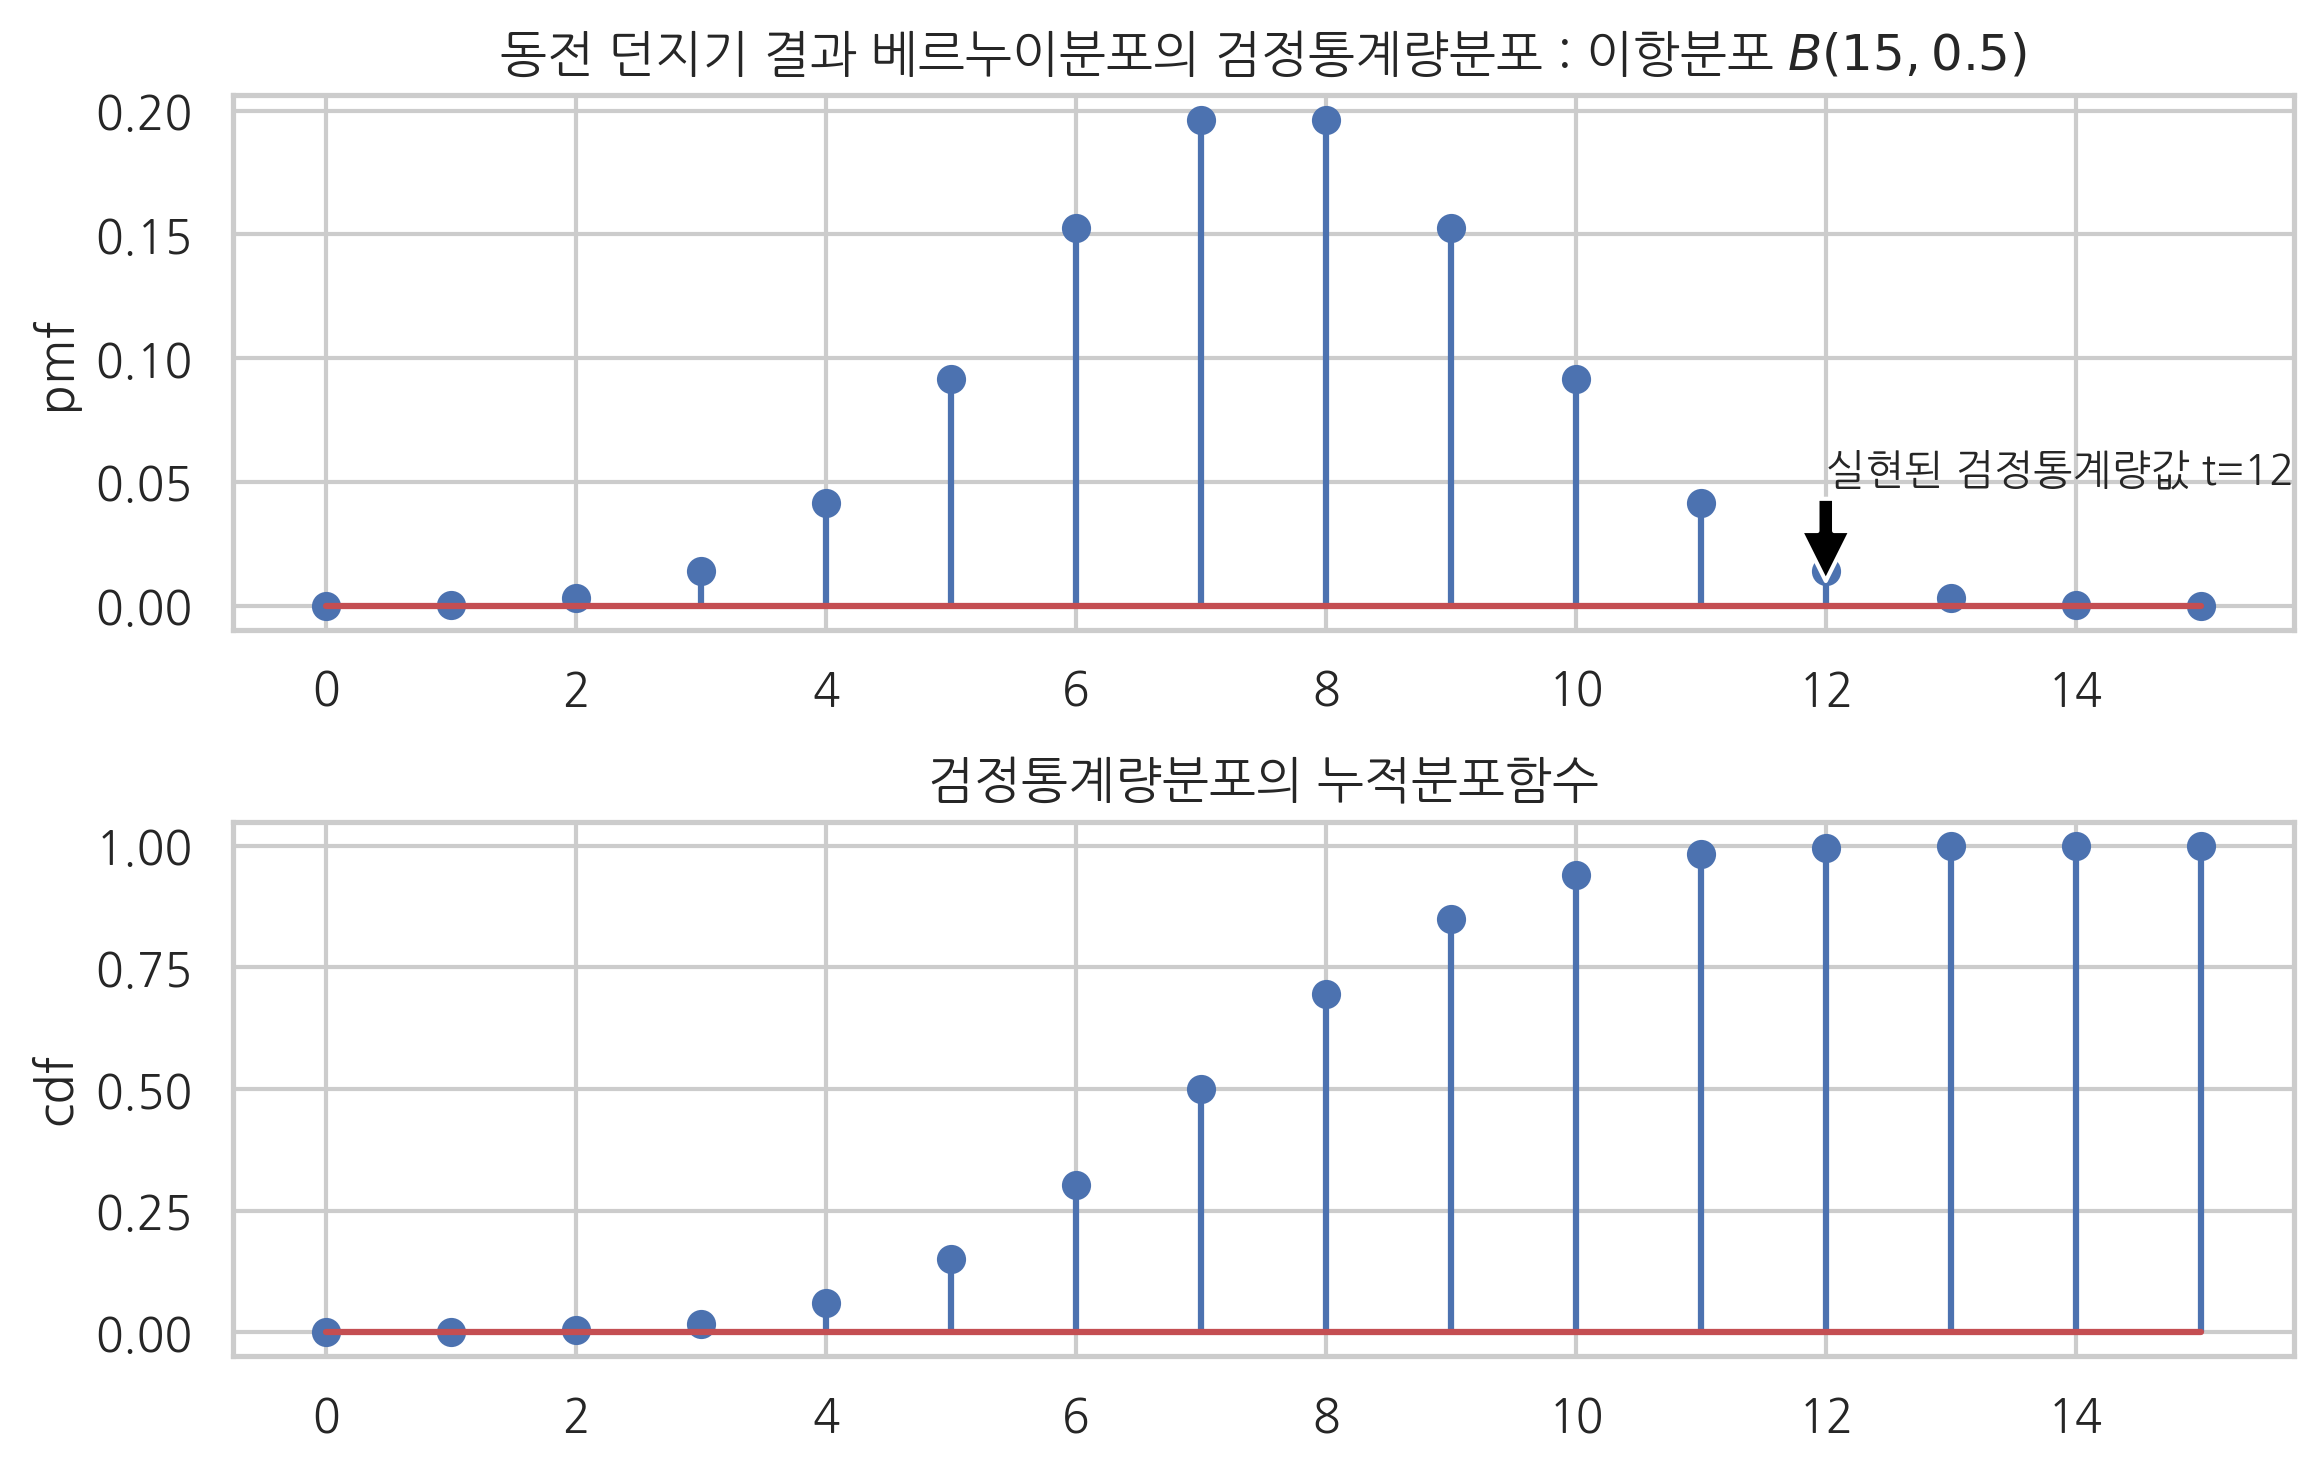

In [228]:
t = 12 # 검정통계량값
# 귀무가설을 따르는 검정통계량분포 
N = 15
xx = np.arange(N+1)
black = {'facecolor' : 'black'}

plt.subplot(211)
plt.stem(xx, sp.stats.binom(N, 0.5).pmf(xx))
plt.title('동전 던지기 결과 베르누이분포의 검정통계량분포 : 이항분포 $B(15, 0.5)$')
plt.ylabel('pmf')
plt.annotate('실현된 검정통계량값 t=12', xy=[12,0.01], xytext=[12,0.05], arrowprops=black)

plt.subplot(212)
plt.stem(xx, sp.stats.binom(N, 0.5).cdf(xx))
plt.title('검정통계량분포의 누적분포함수')
plt.ylabel('cdf')

plt.tight_layout()
plt.show()

In [237]:
rv = sp.stats.binom(15, 0.5)
result = (1-rv.cdf(11))*2
print(f'양측검정 유의확률 : {np.round(result,3)}')

result2 = 1-rv.cdf(11)
print(f'단측검정 유의확률 - 우측검정유의확률 : {np.round(result2, 3)}')

양측검정 유의확률 : 0.035
단측검정 유의확률 - 우측검정유의확률 : 0.018


0.55


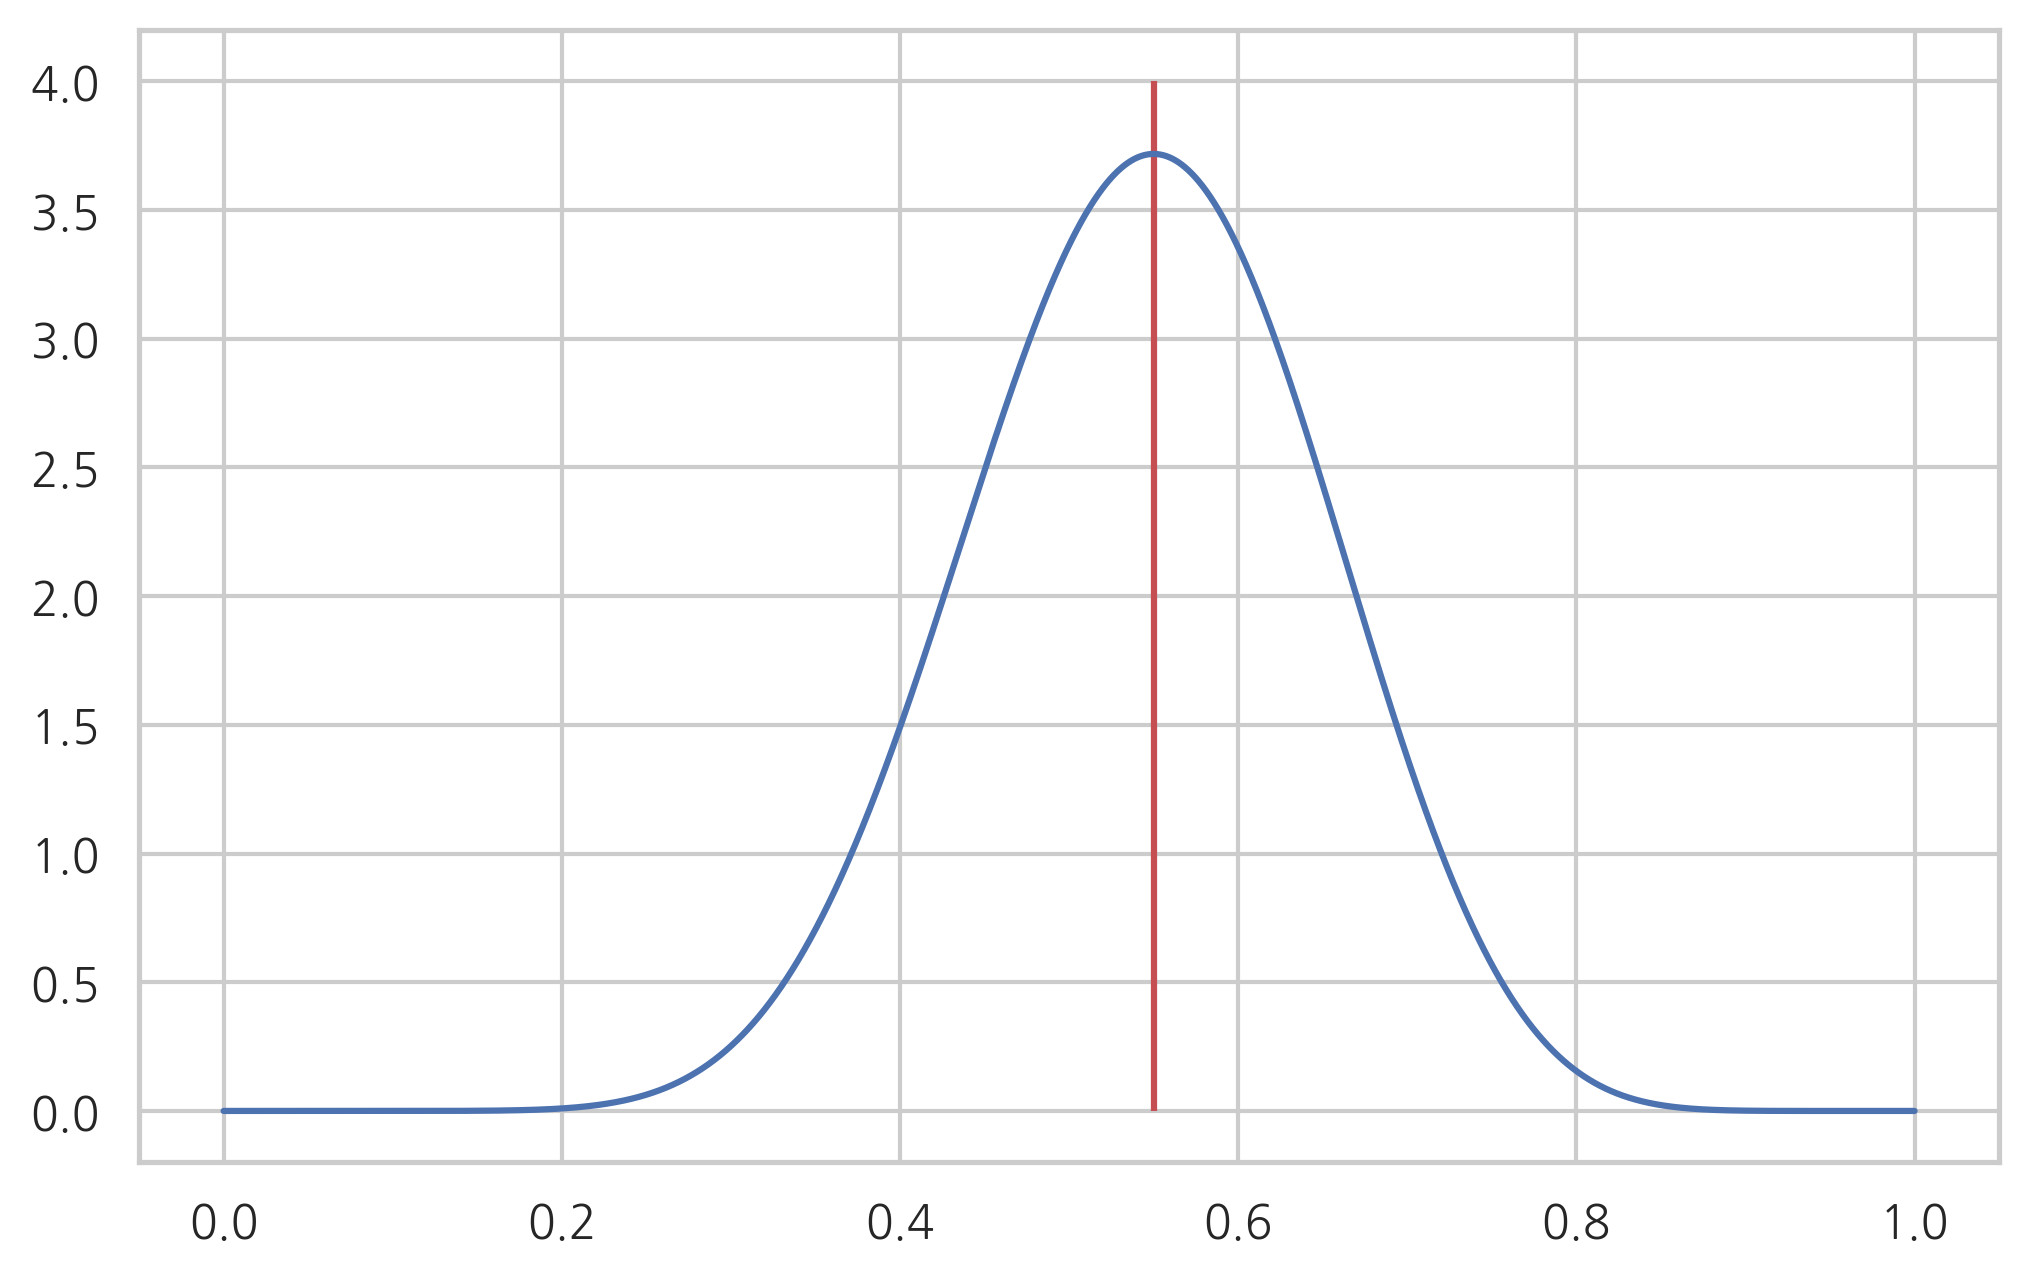

In [243]:
xx = np.linspace(0,1,10000)
plt.plot(xx, sp.stats.beta(12,10).pdf(xx))

print(11/20)
plt.vlines(11/20, ymin=0, ymax=4, colors='r')

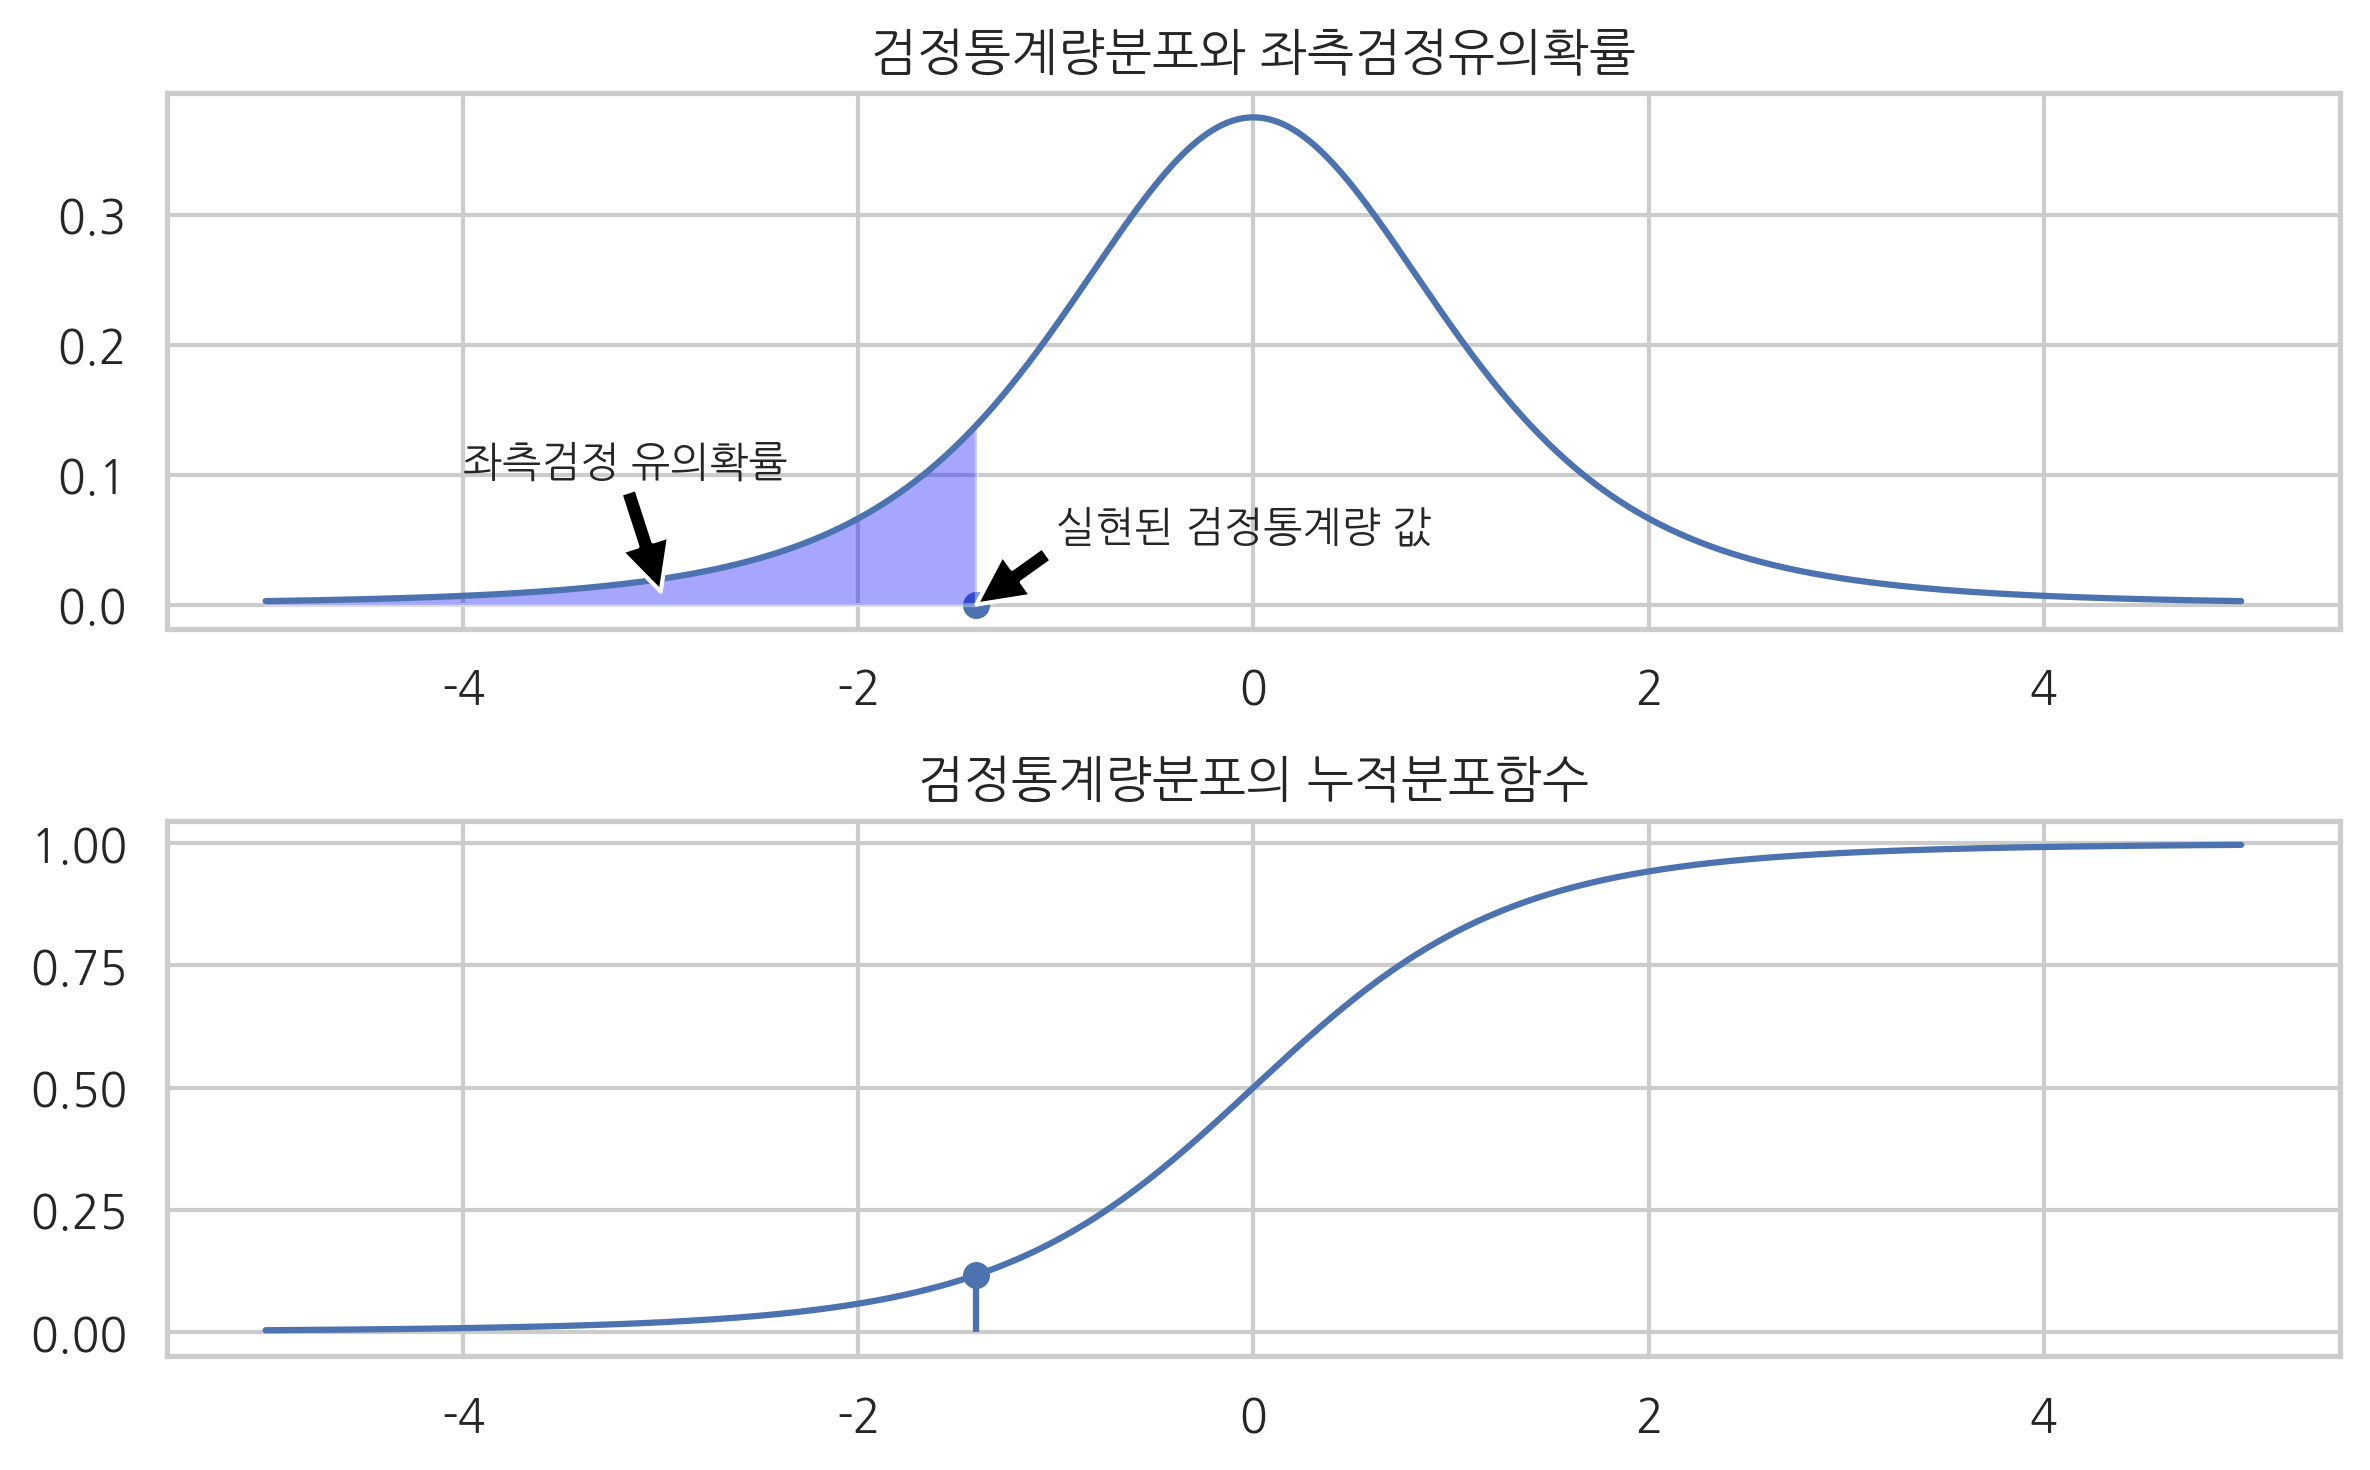

In [272]:
x = np.array([-0.025, -0.05, 0.043, -0.037, -0.056])

t = np.mean(x)/np.std(x, ddof=1)*np.sqrt(len(x))

plt.subplot(211)
xx = np.linspace(-5,5,10000)
plt.plot(xx, sp.stats.t(df=4).pdf(xx), label='검정통계량분포')
plt.scatter(t, 0, 30)
plt.annotate('실현된 검정통계량 값', xy=[t, 0], xytext=[-1,0.05], arrowprops=black)

# 좌측검정 유의확률
xx2 = np.linspace(-5,t,10000)
plt.fill_between(xx2, sp.stats.t(df=4).pdf(xx2), facecolor='blue', alpha=0.35)
plt.annotate('좌측검정 유의확률', xy=[-3, 0.01], xytext=[-4, 0.1], arrowprops=black)

plt.title('검정통계량분포와 좌측검정유의확률')

plt.subplot(212)
plt.plot(xx, sp.stats.t(df=4).cdf(xx))
plt.vlines(t, ymin=0, ymax=sp.stats.t(df=4).cdf(t))
plt.scatter(t, sp.stats.t(df=4).cdf(t), 30)
plt.title('검정통계량분포의 누적분포함수')

plt.tight_layout()
plt.show()


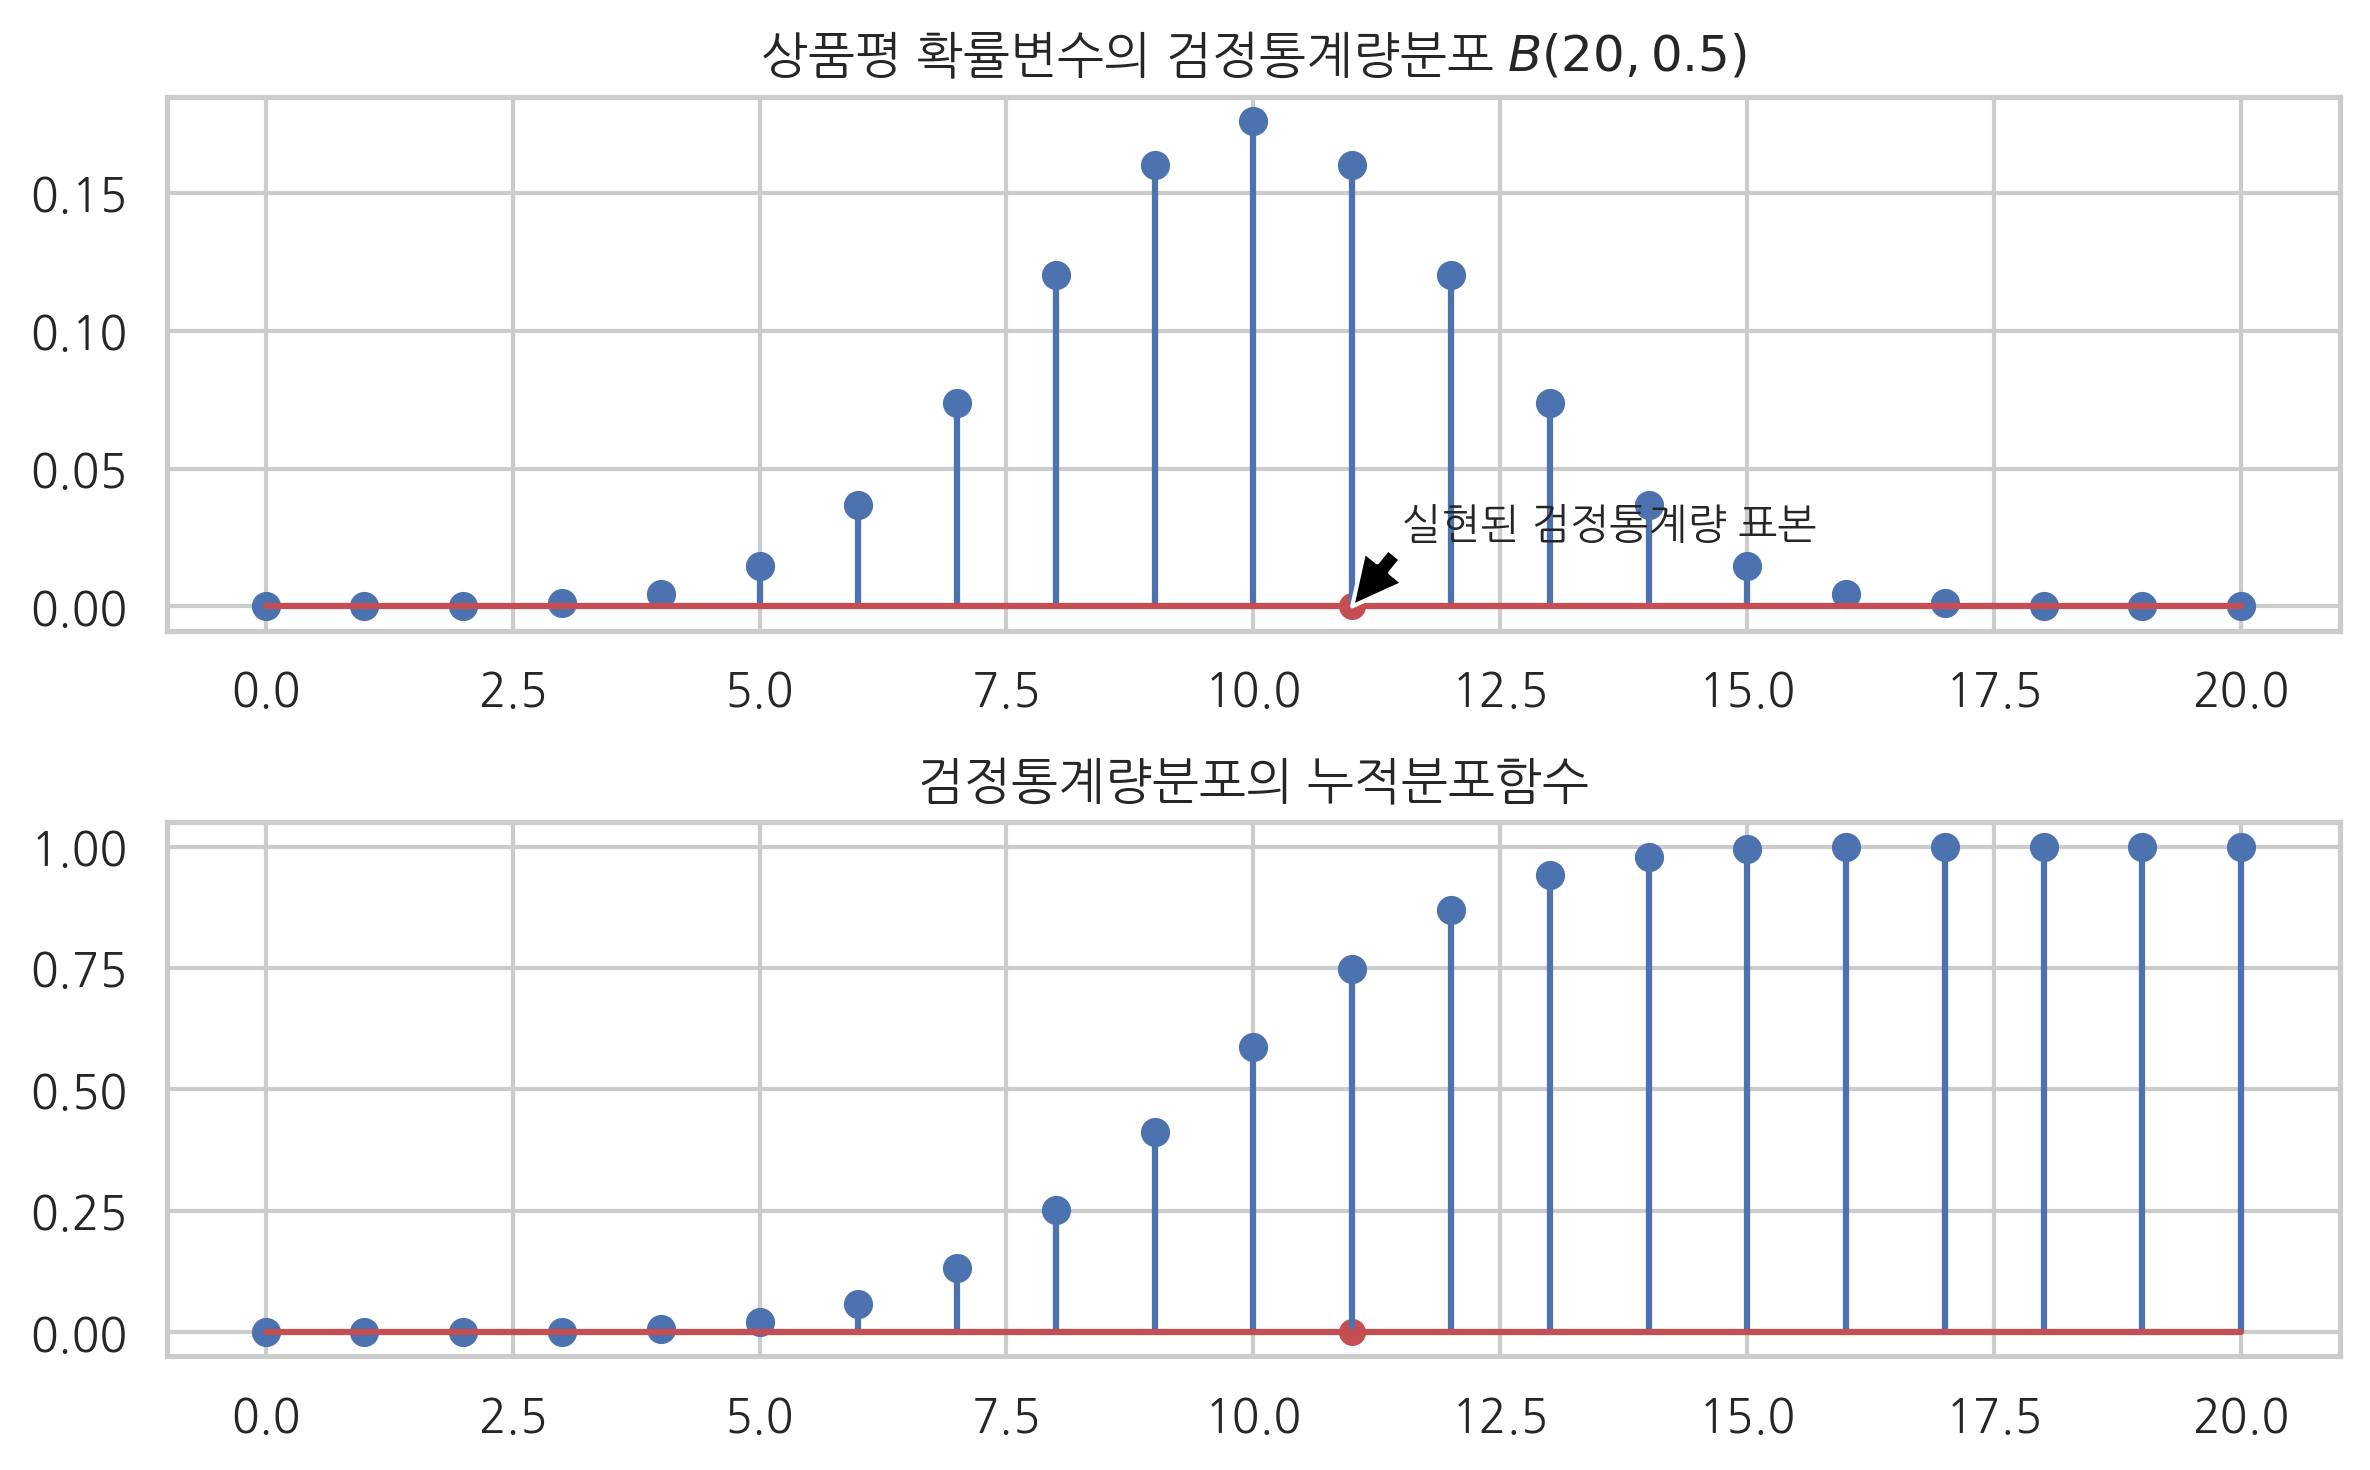

In [288]:
# 9.4.3 연습문제 

mu0 = 0.5
N = 20
xx = np.arange(21)
plt.subplot(211)
plt.stem(xx, sp.stats.binom(N, mu0).pmf(xx))
plt.title('상품평 확률변수의 검정통계량분포 $B(20, 0.5)$')
plt.scatter(11, 0, 30, 'r')
plt.annotate('실현된 검정통계량 표본', xy=[11, 0], xytext=[11.5, 0.025], arrowprops=black)

plt.subplot(212)
plt.stem(xx, sp.stats.binom(N, mu0).cdf(xx))
plt.title('검정통계량분포의 누적분포함수')
plt.scatter(11,0, 30, 'r')
plt.tight_layout()
plt.show()

In [290]:
rv = sp.stats.binom(N, mu0)
1-rv.cdf(11-1)

0.4119014739990232